<h><font size = 5><FONT COLOR ='blue'><B>3. visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.</B></FONT></h>

In [54]:
pip install yellowbrick --user


  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


In [7]:
import pandas as pd
import numpy as np

<H><B>DF_SEGMENTATION_1</B></H>

In [8]:
customer_df = pd.read_csv("df_segmentation_1.csv")

In [9]:
customer_df

cust_id    income       age  nbr_children  gender_F   gender_M   \
0    1362691  0.195392  0.187637      0.258461          0          1   
1    1362487 -0.752042  1.494486     -0.647371          0          1   
2    1363160 -0.173111 -0.230554     -0.647371          1          0   
3    1362752  1.238466  0.605829     -0.647371          1          0   
4    1362548  1.087516  0.867199      1.164293          1          0   
..       ...       ...       ...           ...        ...        ...   
738  1363324 -0.355036 -0.335102      0.258461          1          0   
739  1362895  0.206880  0.710377      0.258461          0          1   
740  1362569  1.899270  0.396733      1.164293          0          1   
741  1363364 -0.340251 -0.282828     -0.647371          1          0   
742  1363303 -0.205734 -1.276033     -0.647371          1          0   

     marital_status_1  marital_status_2  marital_status_3  marital_status_4  \
0                   0                 1                 0                 0   
1                   0                 1                 0                 0   
2                   1                 0                 0                 0   
3                   1                 0                 0                 0   
4                   0                 0                 0                 1   
..                ...               ...               ...               ...   
738                 0                 0                 0                 1   
739                 0                 1                 0                 0   
740                 0                 1                 0                 0   
741                 0                 1                 0                 0   
742                 1                 0                 0                 0   

     cluster_id  
0             1  
1             1  
2             0  
3             1  
4             2  
..          ...  
738           0  
739           1  
740           2  
741           1  
742           0  

[743 rows x 11 columns]

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(customer_df)

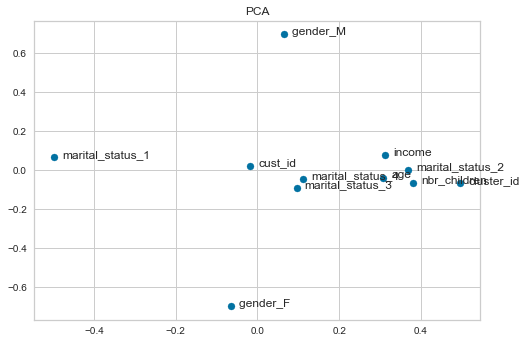

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)
components = pca.components_

fig, ax = plt.subplots(1,1)
ax.set_title("PCA")
ax.scatter(components[0], components[1])

for i, txt in enumerate(customer_df.columns.to_list()):
    ax.annotate(txt, (components[0][i], components[1][i]), xytext=(8,0), textcoords='offset points')
    
fig.savefig('images_customer/PCA_components.png')

C:\Users\SPECIAL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


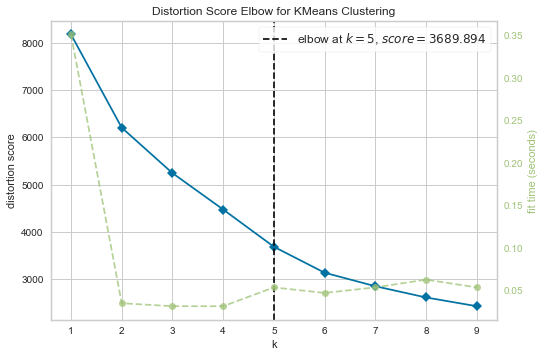

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
#Plotting Elbow Curve
from sklearn.cluster import KMeans
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_df)
visualizer.poof()

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_df)
k_labels = kmeans.labels_

In [15]:
new_columns = kmeans.predict(scaled_df)
new_cols = pd.DataFrame(new_columns)

In [16]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

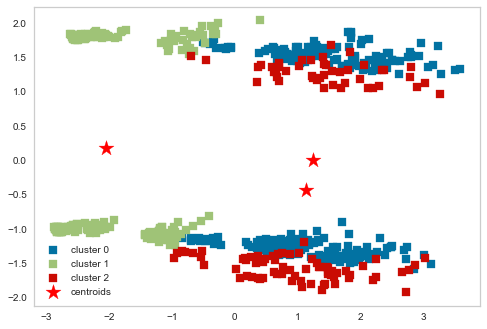

In [17]:
plot_clusters(X_pca, k_labels, plt_cluster_centers= True)

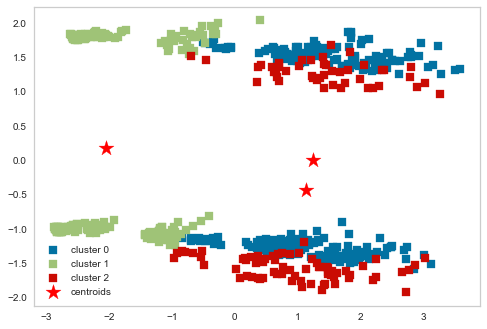

In [18]:
plot_clusters(X_pca, k_labels, plt_cluster_centers= True)

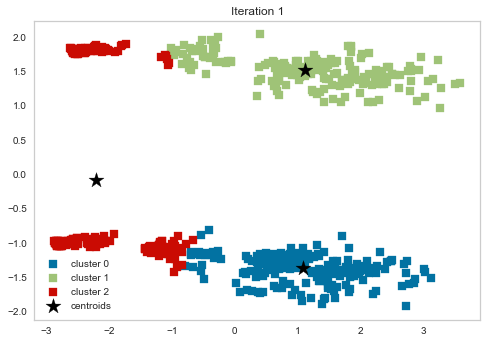

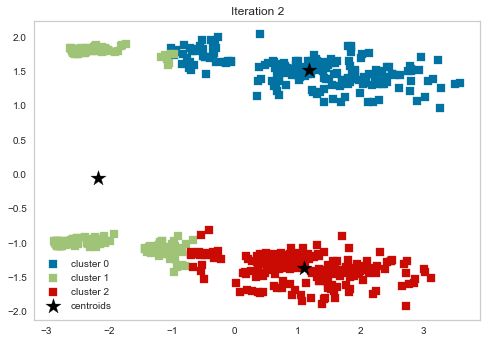

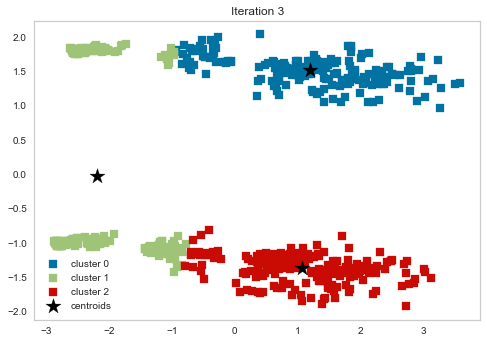

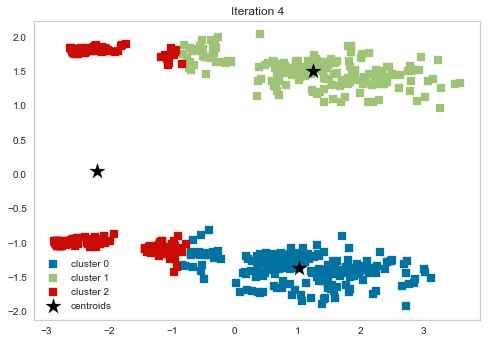

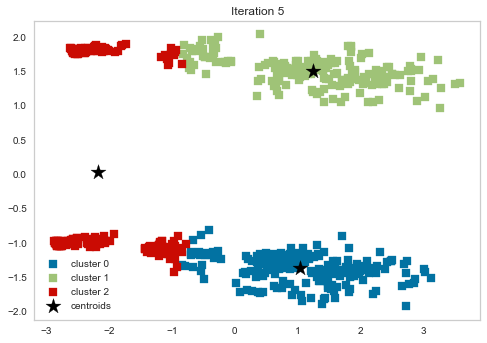

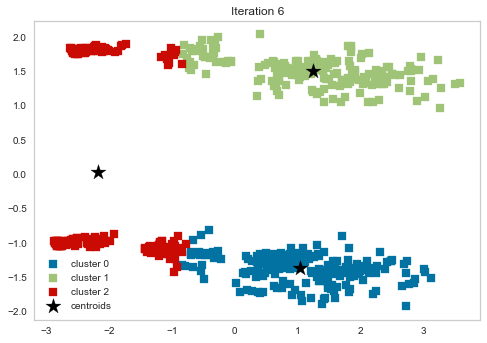

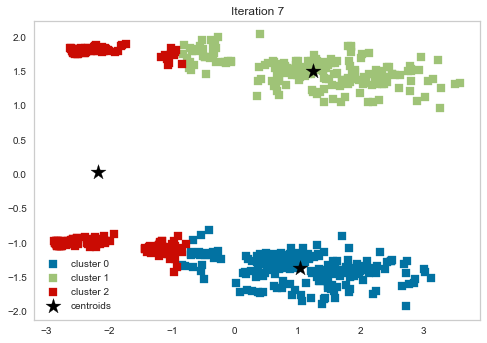

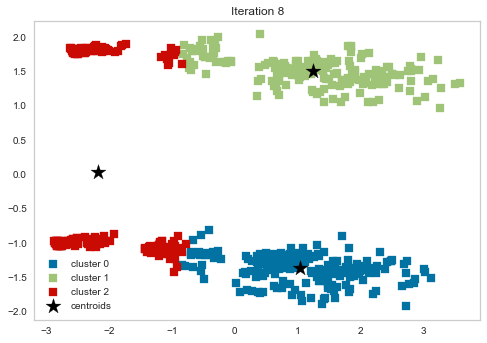

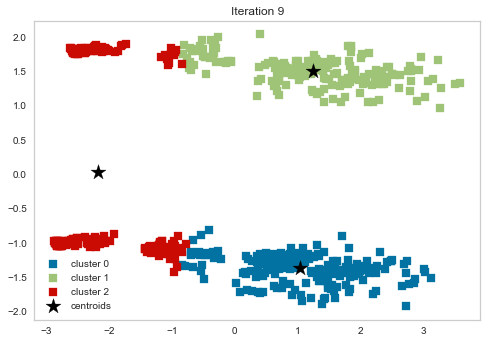

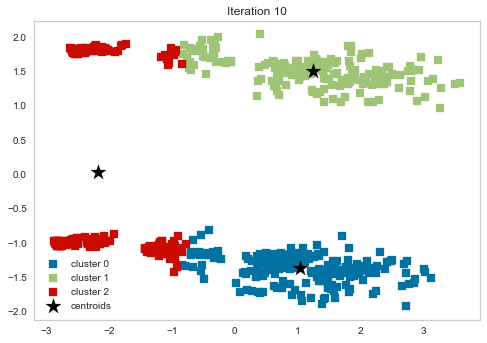

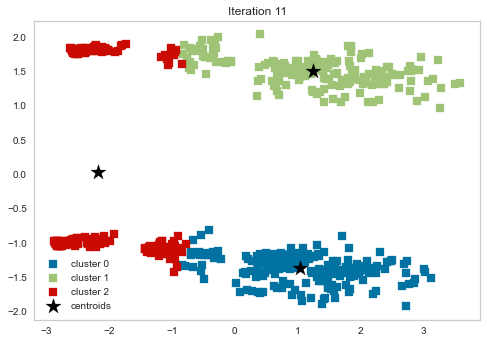

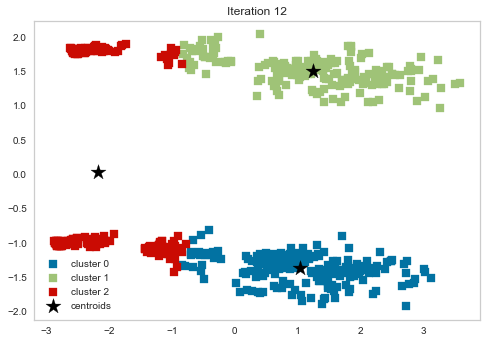

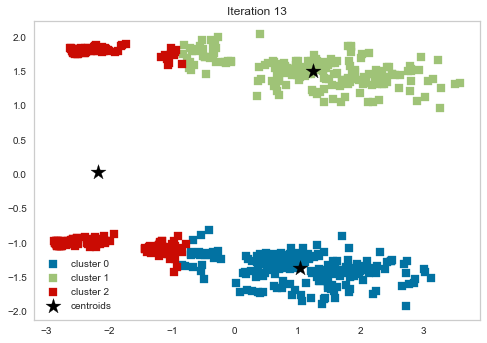

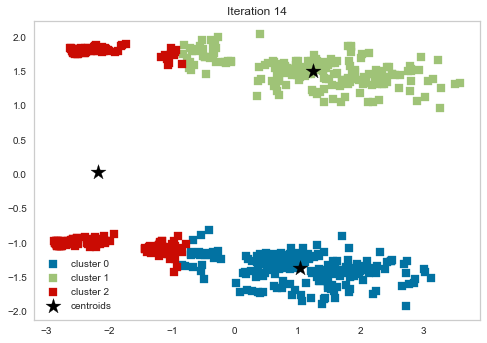

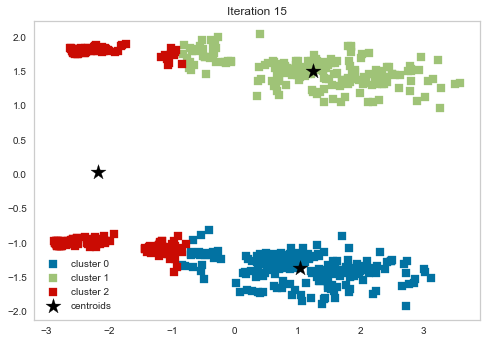

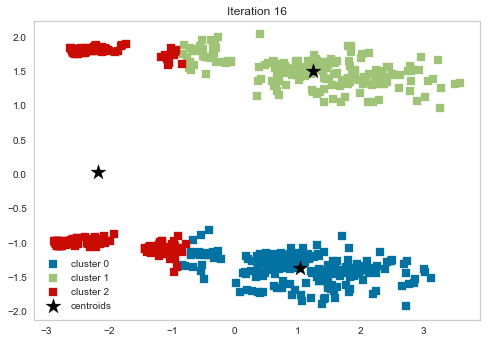

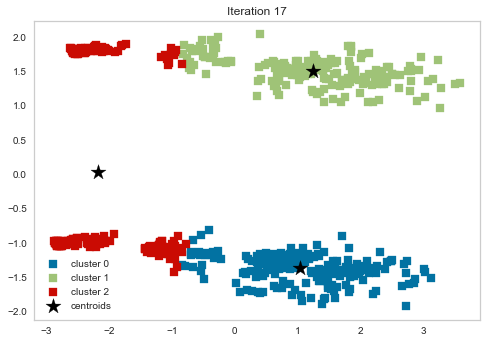

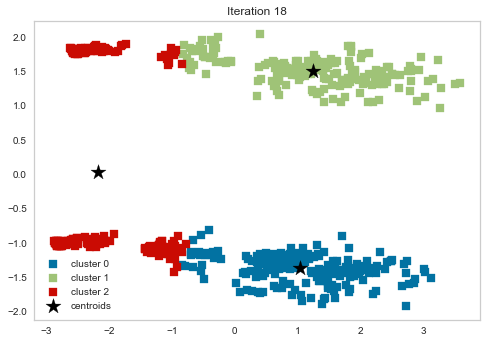

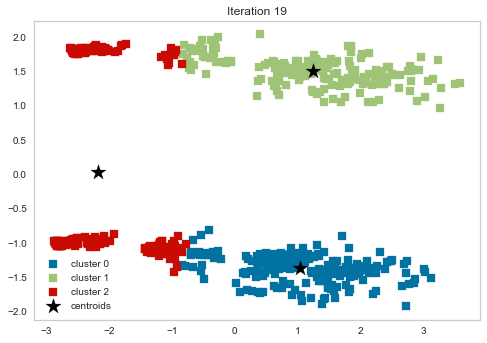

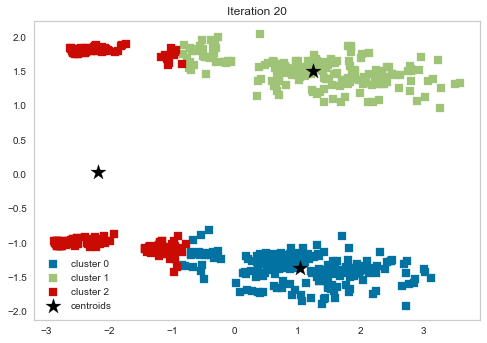

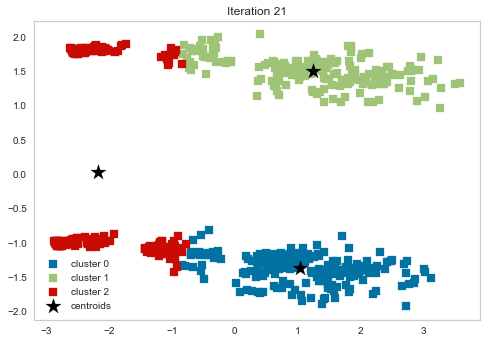

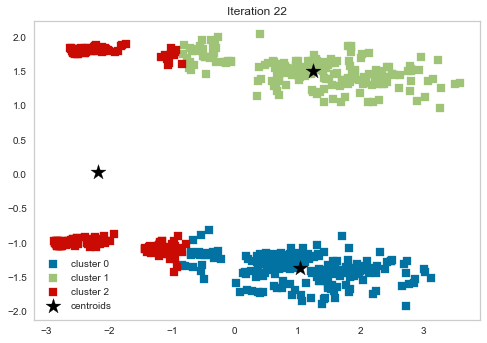

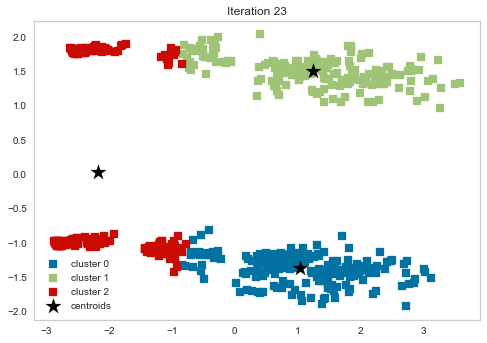

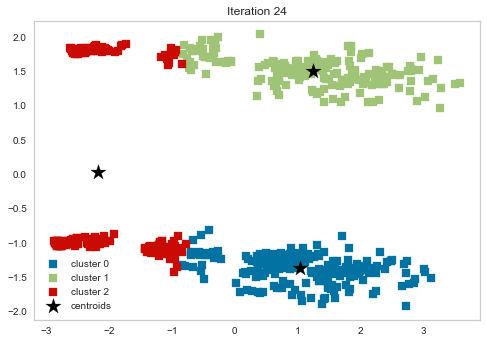

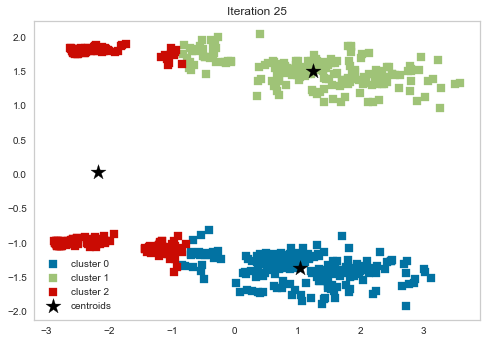

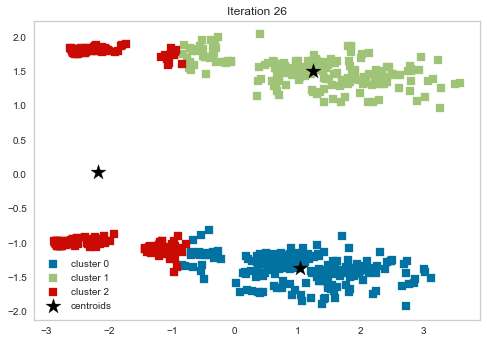

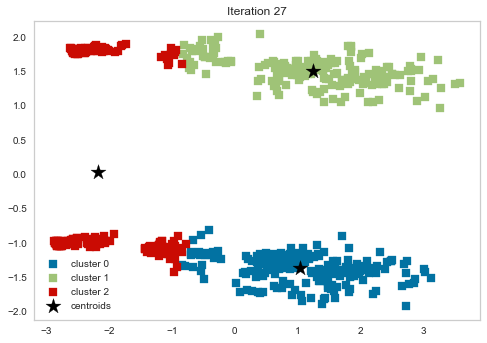

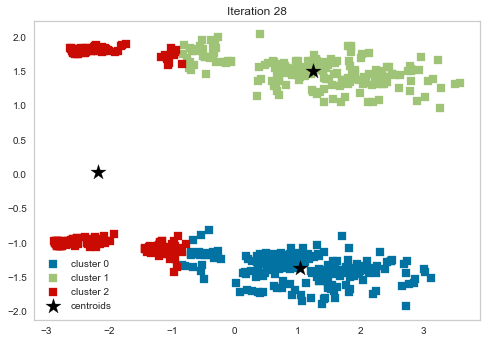

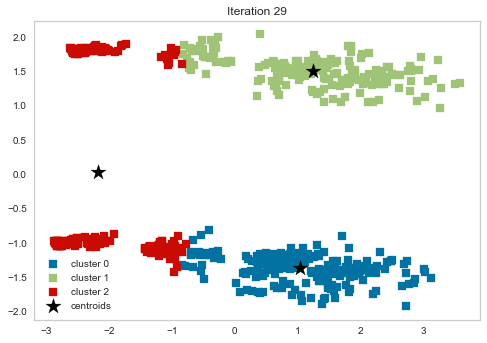

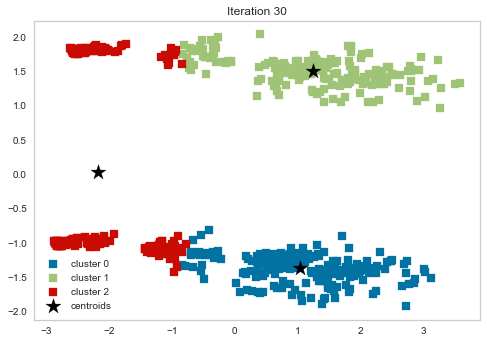

In [21]:
for i in range(1,31):
    if i == 1:
        temp = KMeans(n_clusters=3, init='random', max_iter=i, random_state=0).fit(X_pca)
    else:
        temp = KMeans(n_clusters=3, max_iter=i, random_state=42).fit(X_pca)
    clust_label = temp.labels_
    centroid = temp.cluster_centers_
    for cluster in set(clust_label):
        x = X_pca[clust_label == cluster, 0]
        y = X_pca[clust_label == cluster, 1]
        plt.scatter(x, y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    plt.scatter(centroid[:, 0], centroid[:, 1],
                marker='*',
                c='black',
                s=250,
                label='centroids')
    plt.legend()
    plt.grid()
    plt.title(f'Iteration {i}')
    plt.savefig(f'{i} cust1.png')
    plt.show()

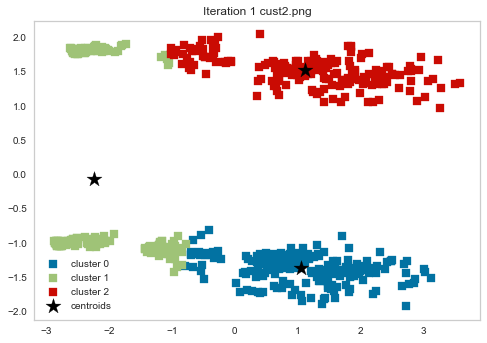

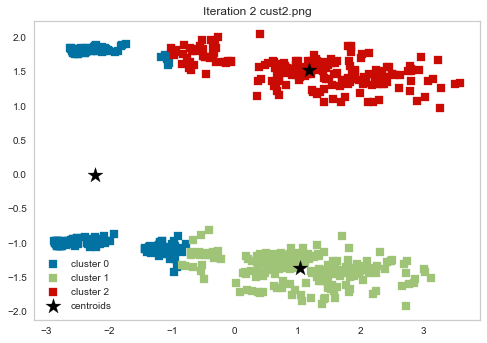

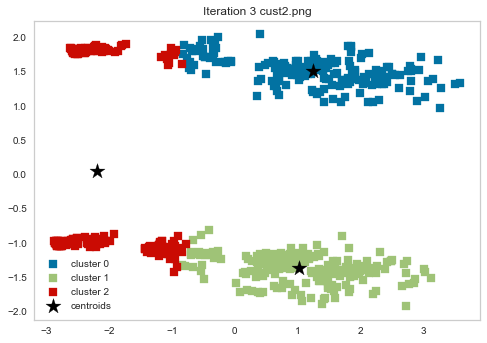

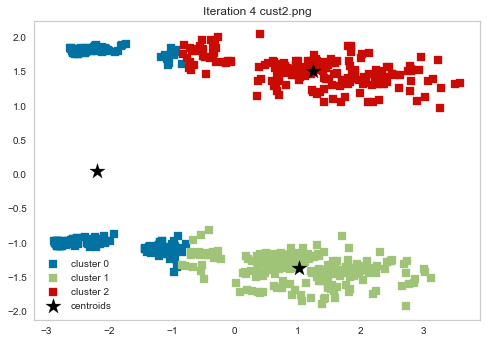

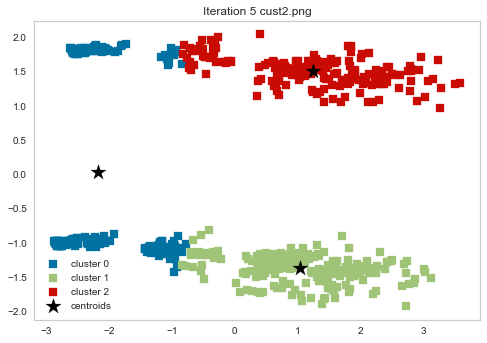

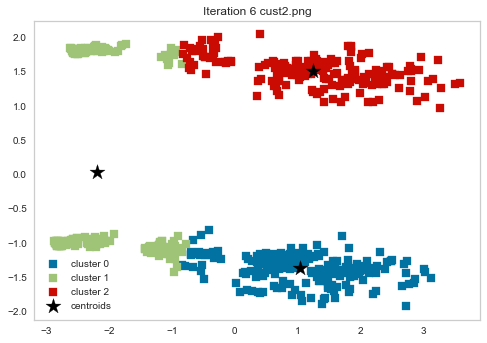

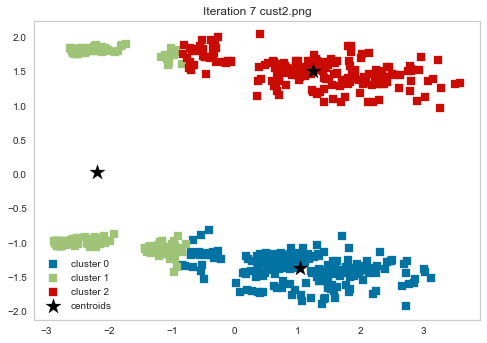

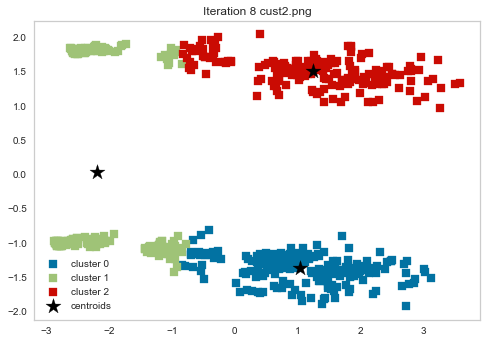

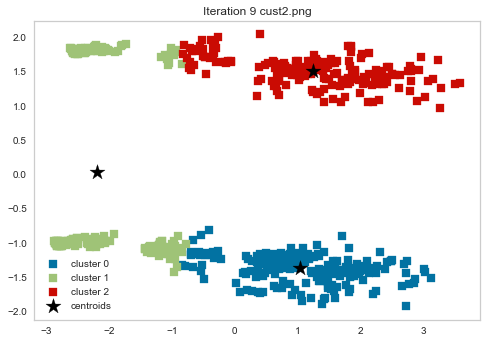

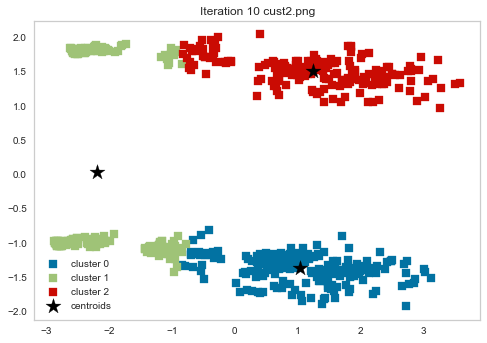

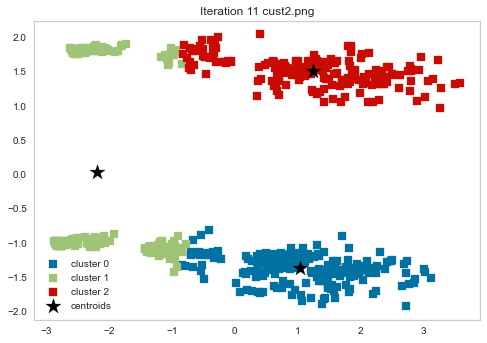

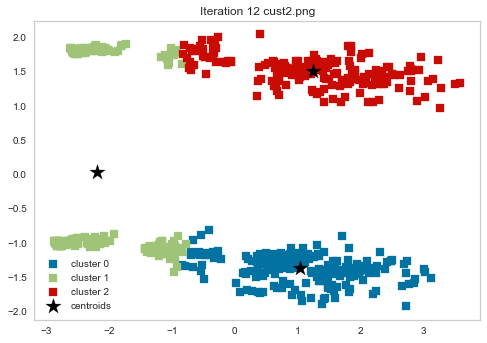

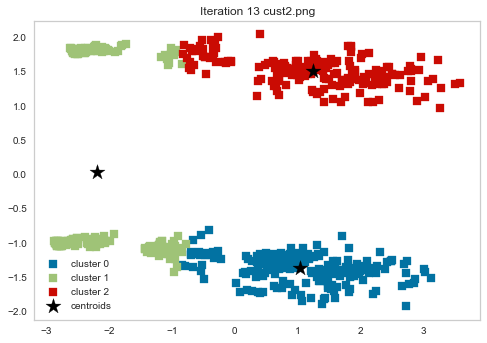

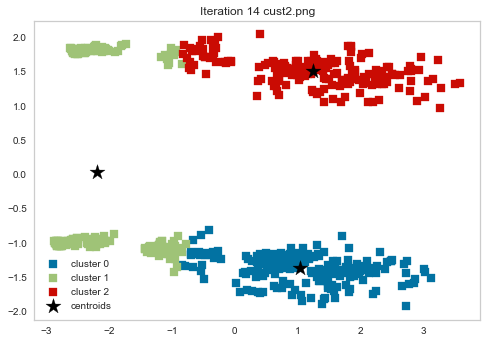

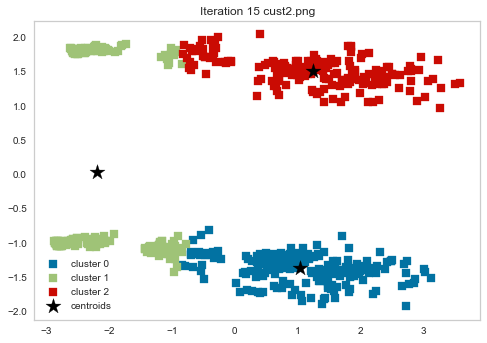

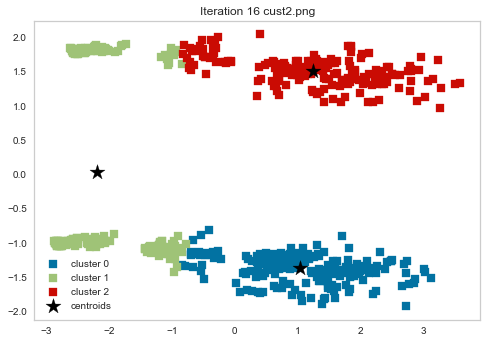

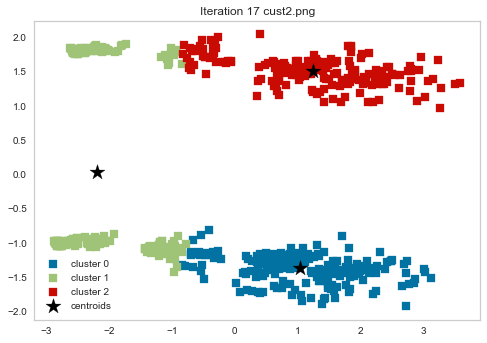

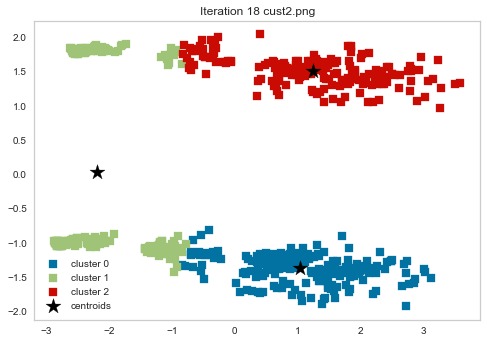

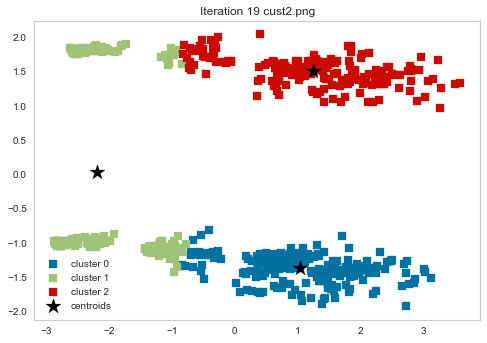

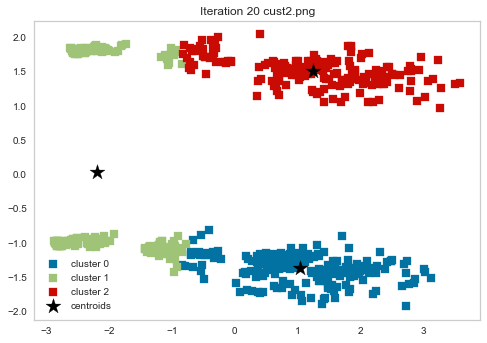

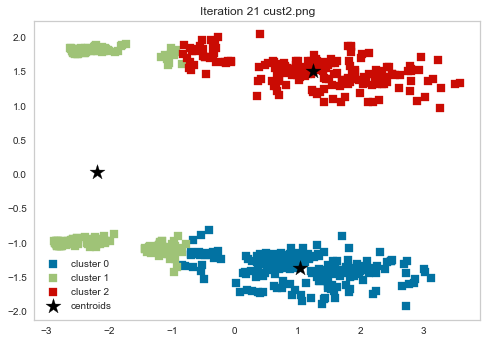

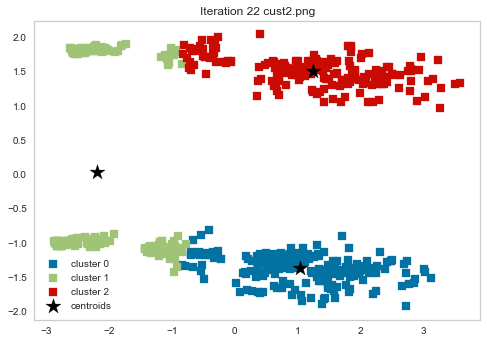

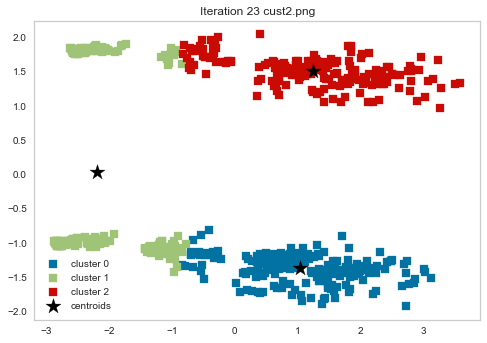

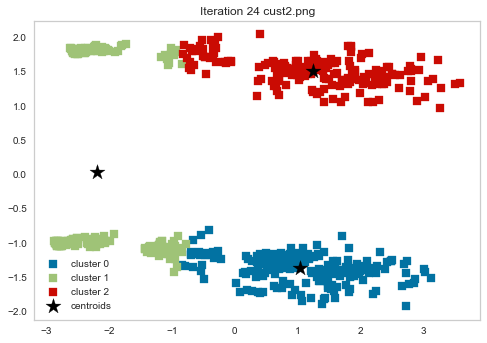

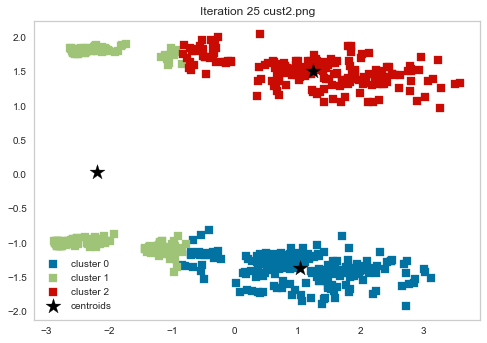

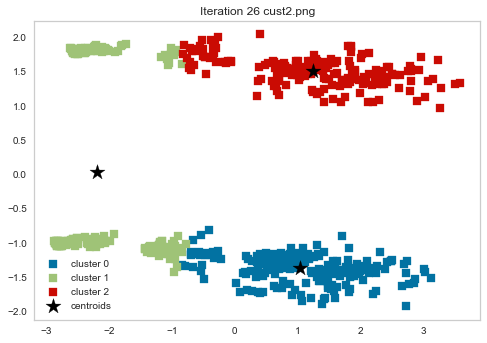

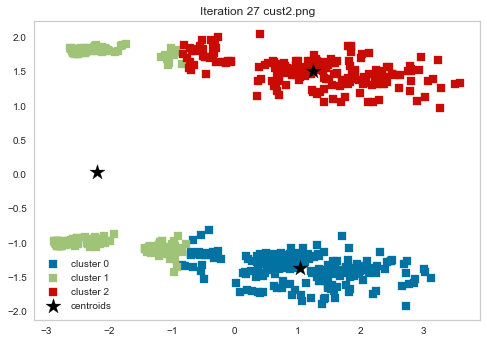

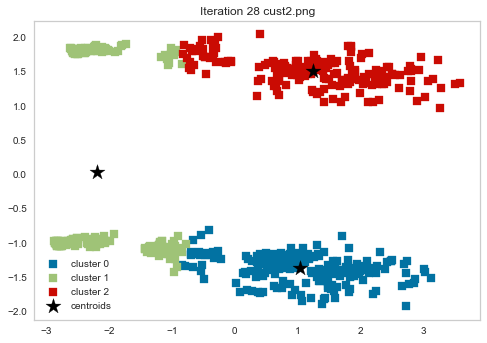

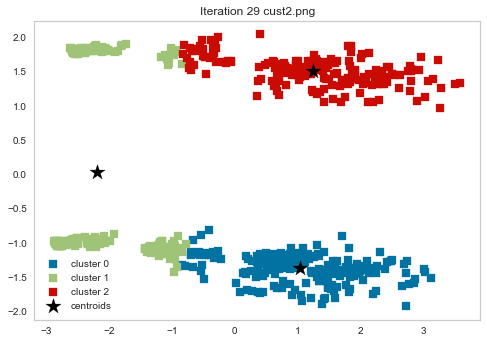

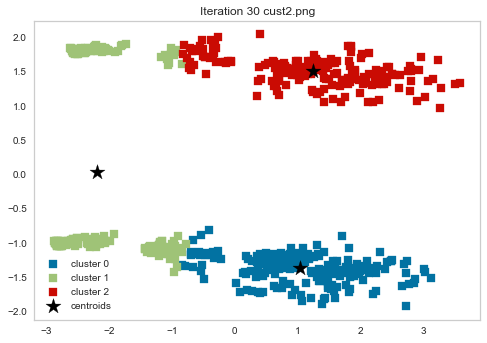

In [22]:
for i in range(1,31):
    temp = KMeans(n_clusters=3, max_iter=i, random_state=0).fit(X_pca)
    clust_label = temp.labels_
    centroid = temp.cluster_centers_
    for cluster in set(clust_label):
        x = X_pca[clust_label == cluster, 0]
        y = X_pca[clust_label == cluster, 1]
        plt.scatter(x, y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    plt.scatter(centroid[:, 0], centroid[:, 1],
                marker='*',
                c='black',
                s=250,
                label='centroids')
    plt.title(f'Iteration {i} cust2.png')
    plt.legend()
    plt.grid()
    plt.show()

In [23]:
def plot_clusters_title(X,y_res, title):
    
    for cluster in set(y_res):
        X_centroids = []
        Y_centroids = []
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        plt.title(f'Iteration {title}')
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='black',
                    s=250,
                    label='centroids')
    #plt.legend()
    plt.grid()
    plt.savefig(f'cust_demo_kmean_iter/Iteration {title}')
    plt.show()

In [24]:
k_labels_list = []
for i in range(1,31):
    temp = KMeans(n_clusters=3, max_iter=i)
    temp.fit_transform(scaled_df)
    k_labels_list.append(temp.labels_)

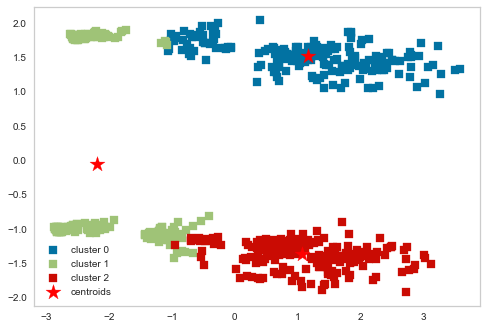

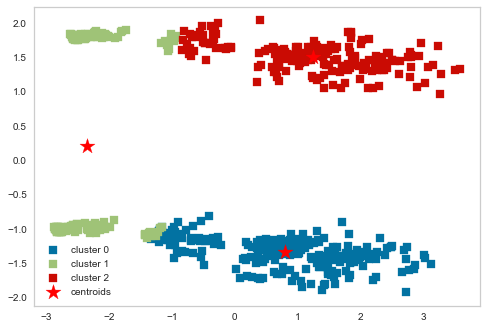

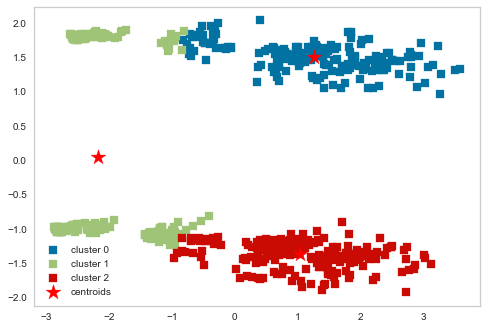

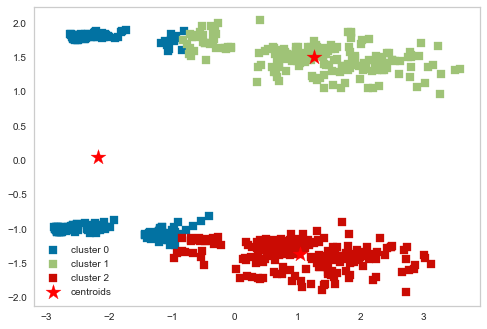

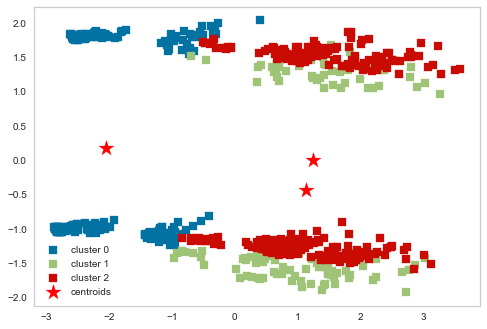

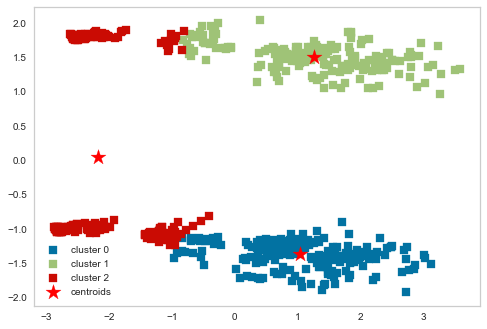

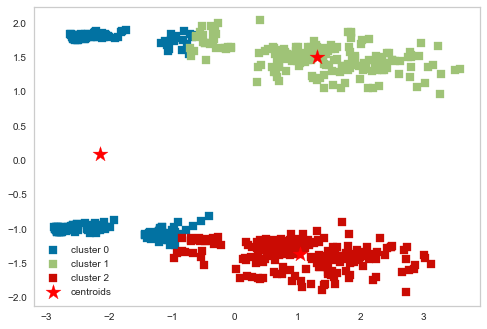

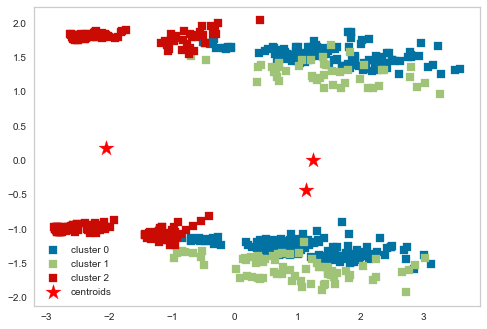

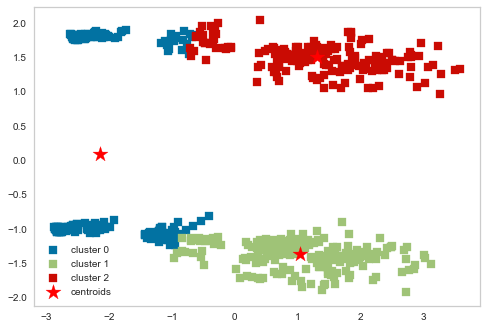

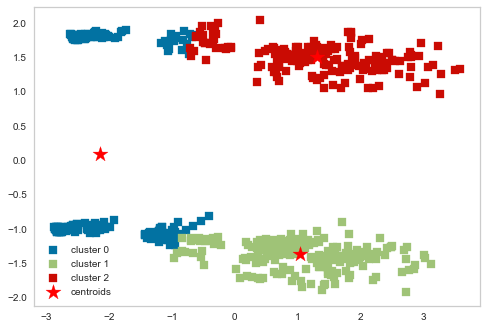

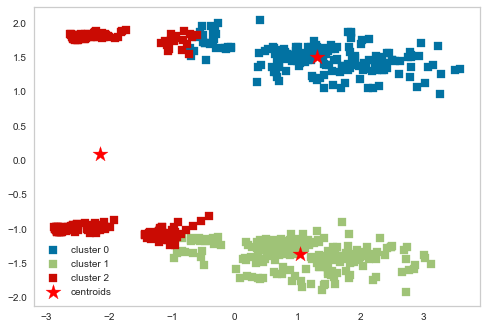

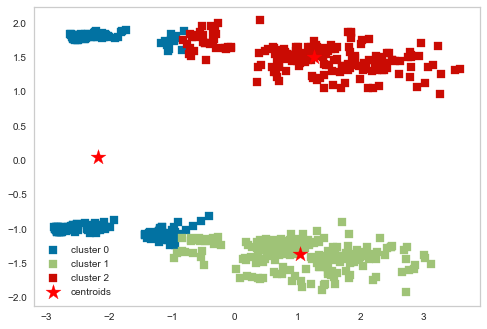

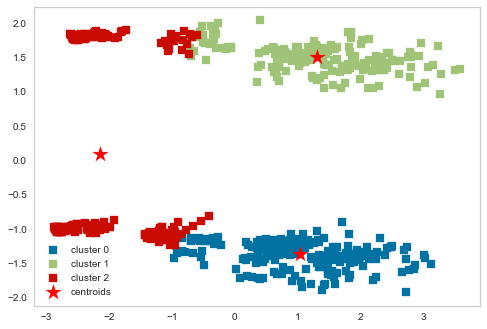

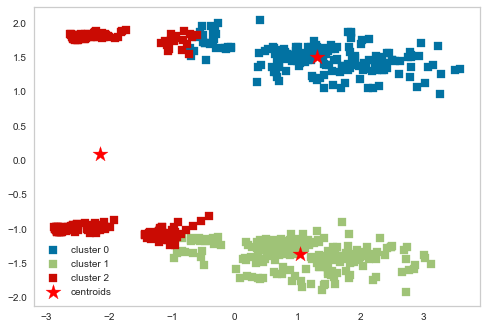

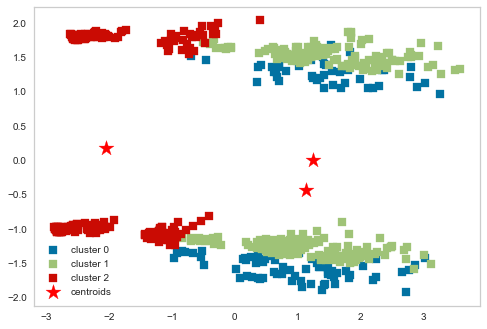

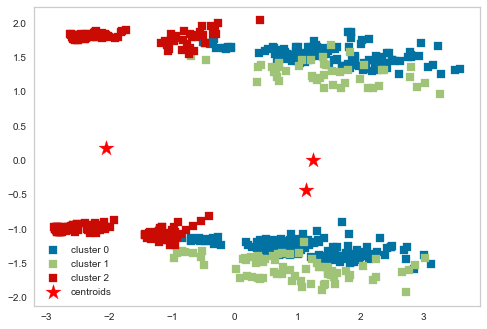

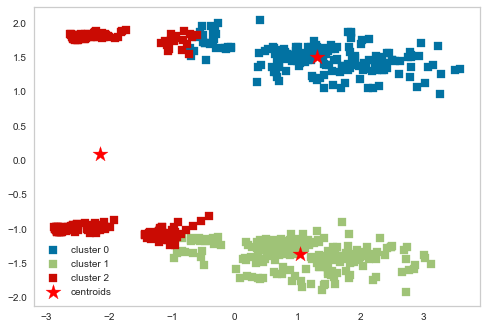

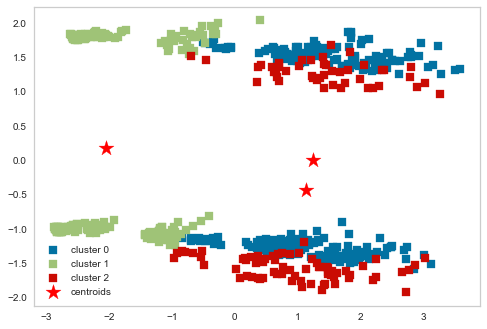

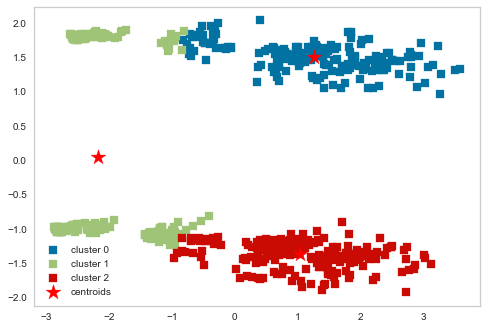

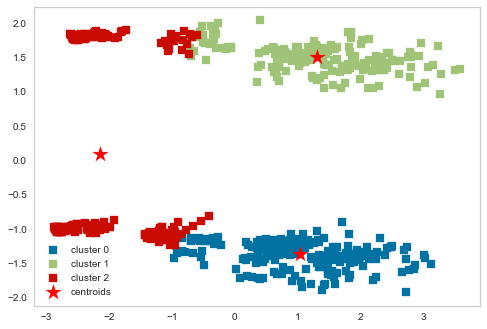

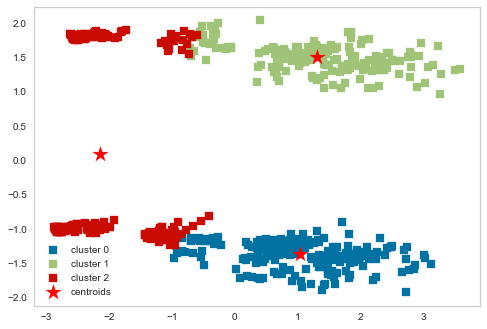

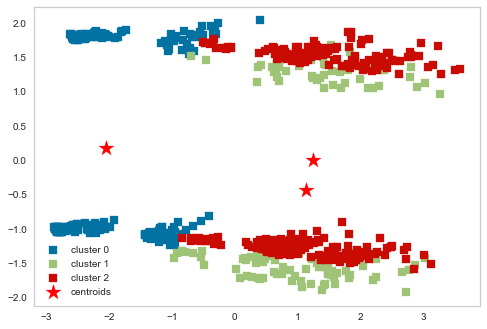

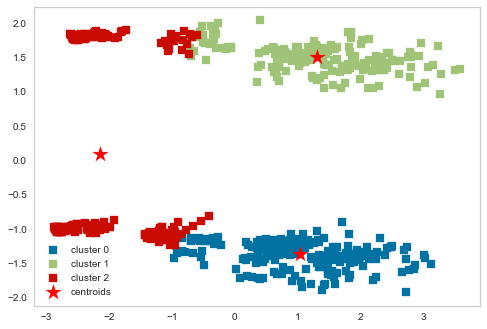

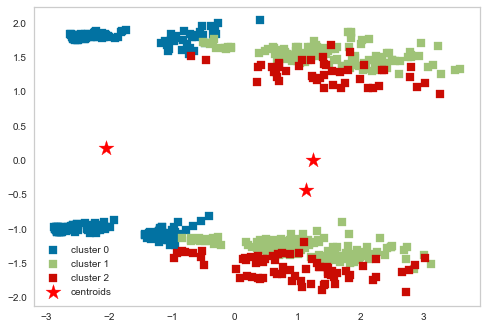

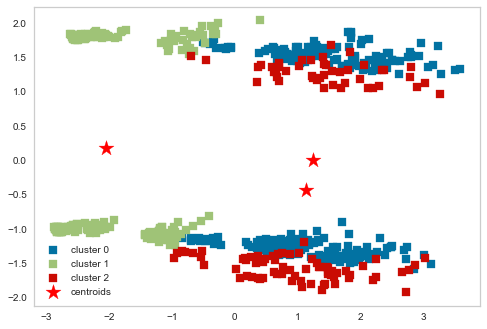

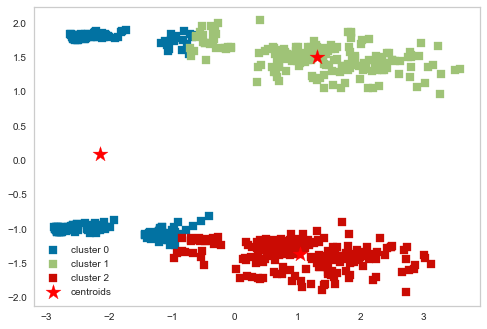

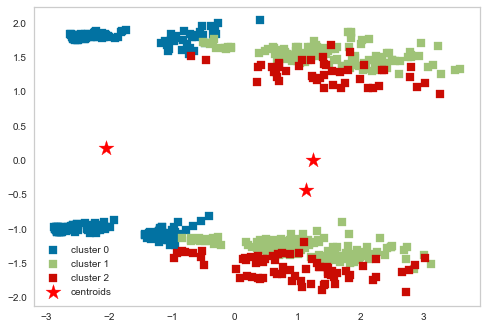

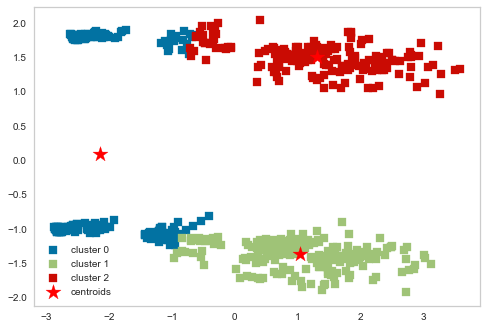

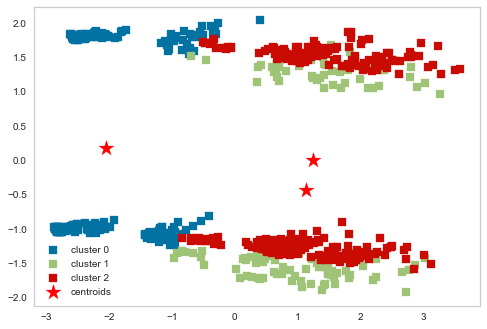

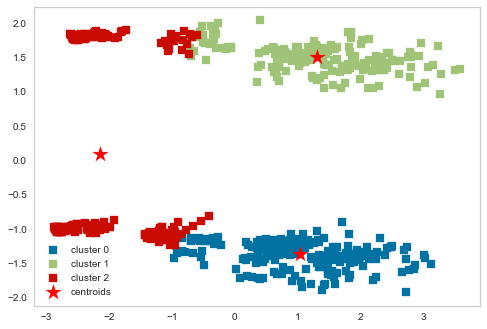

In [25]:
ctr = 1
for i in k_labels_list:
    plot_clusters(X_pca, i, ctr)
    ctr += 1

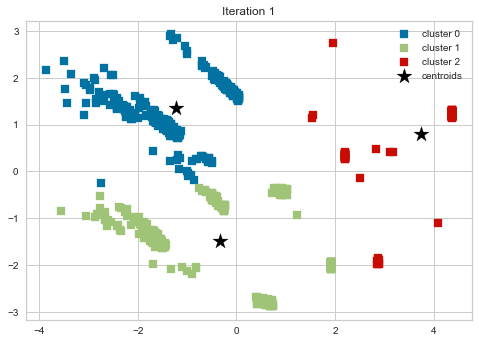

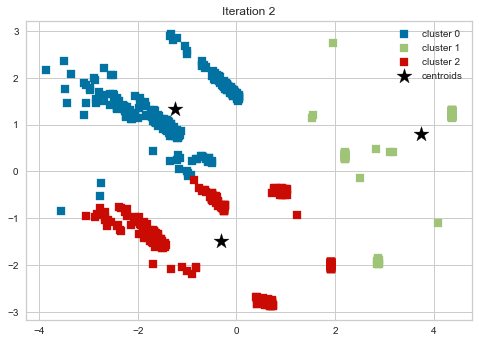

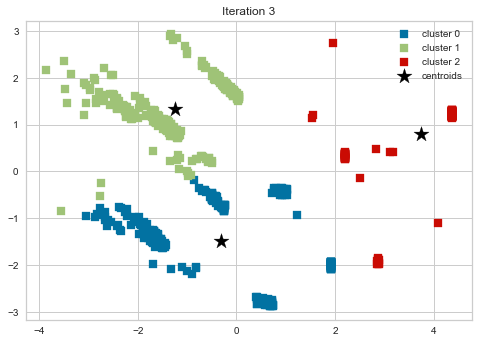

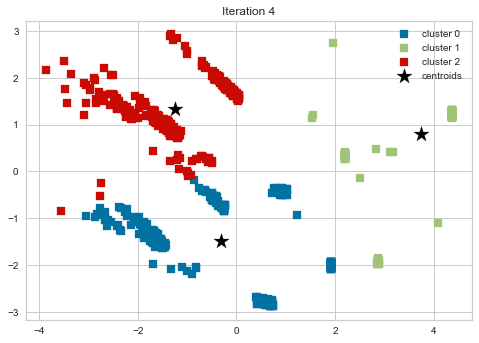

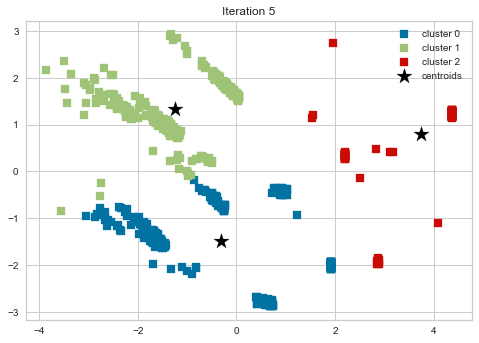

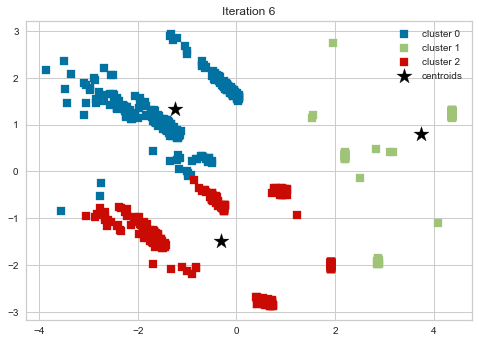

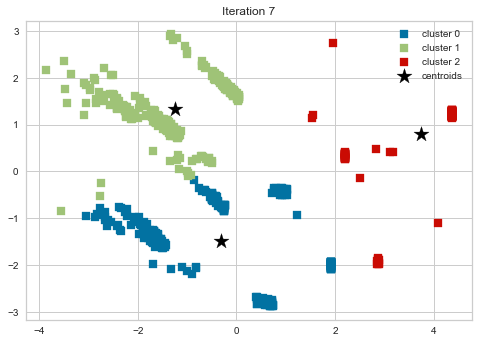

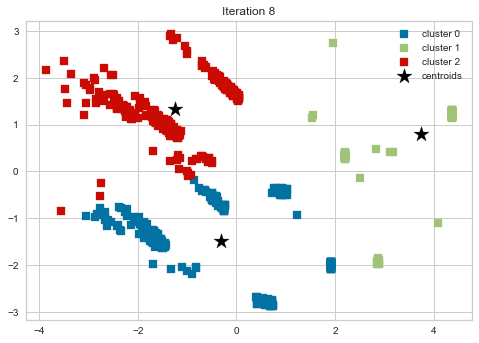

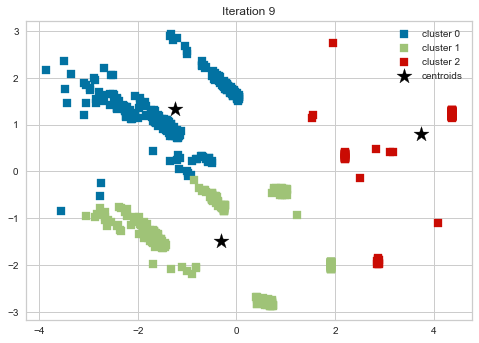

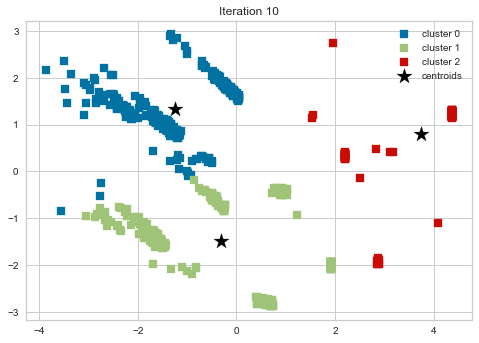

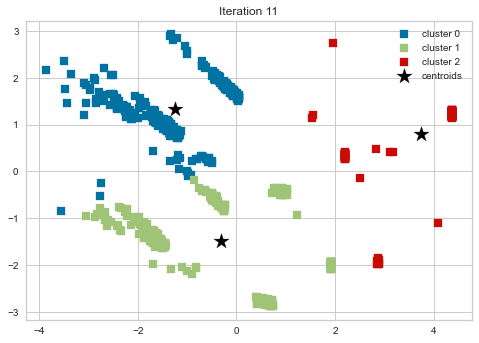

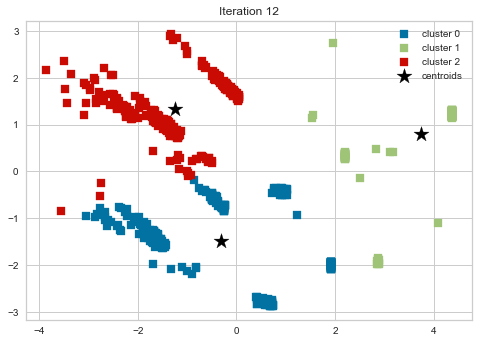

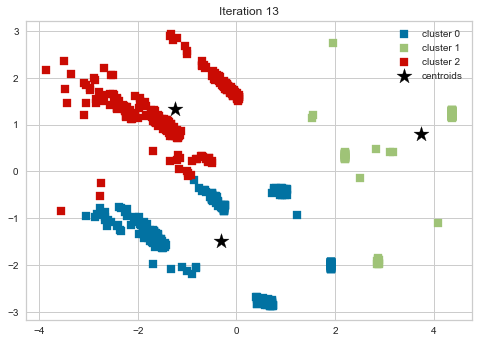

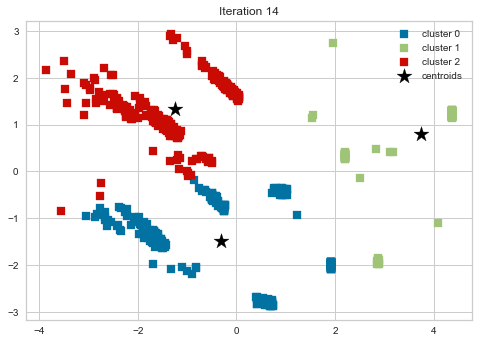

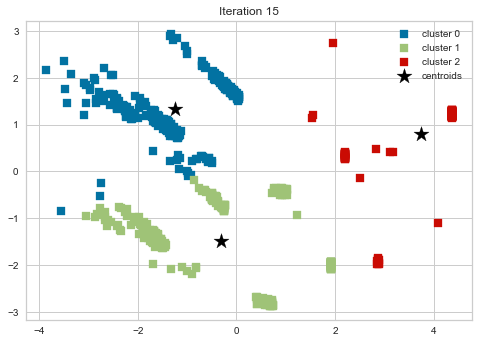

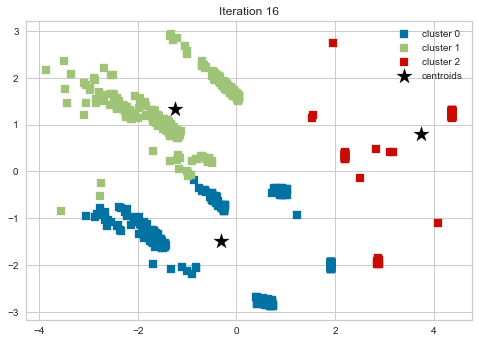

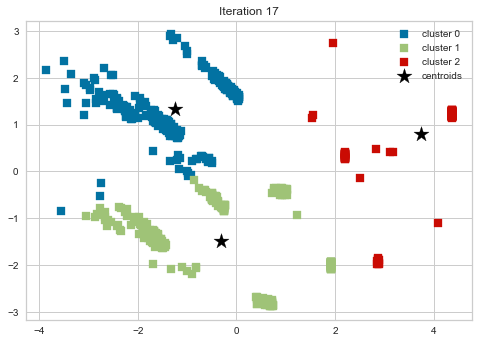

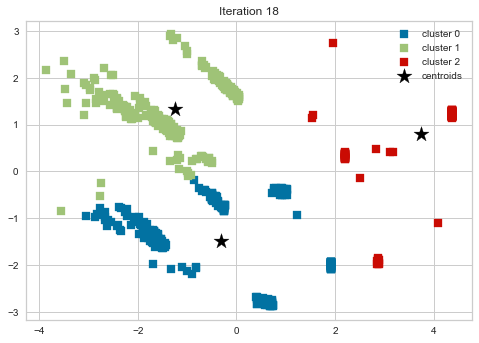

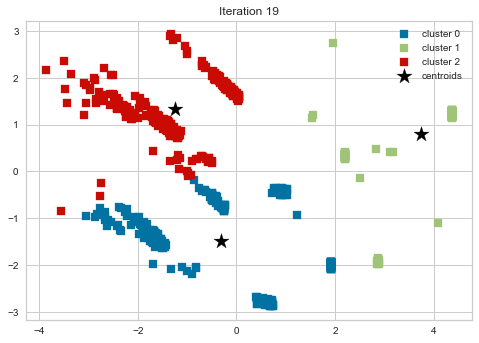

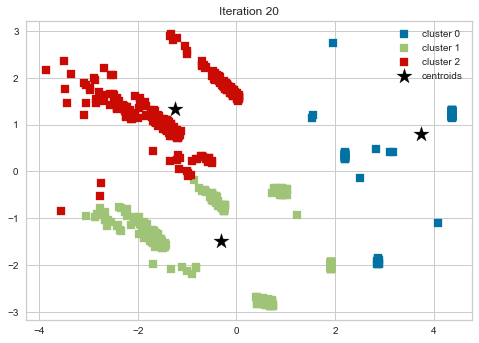

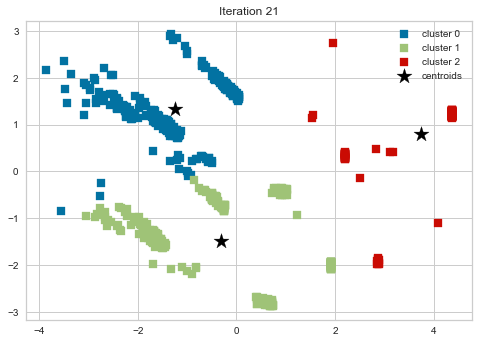

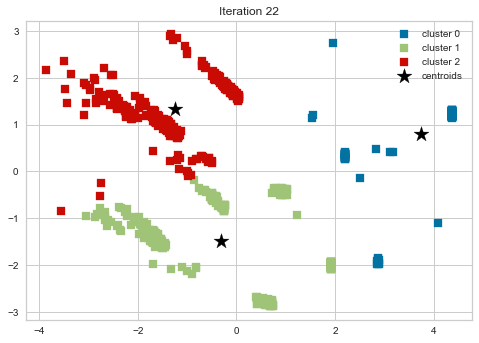

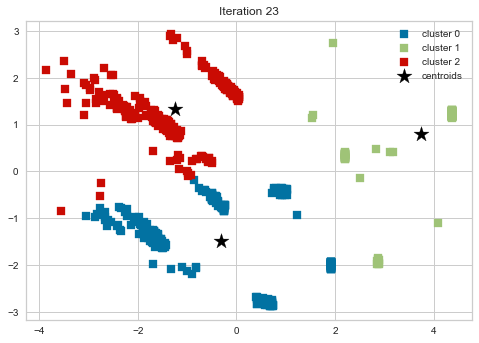

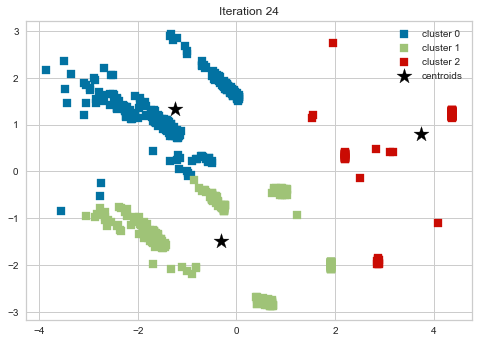

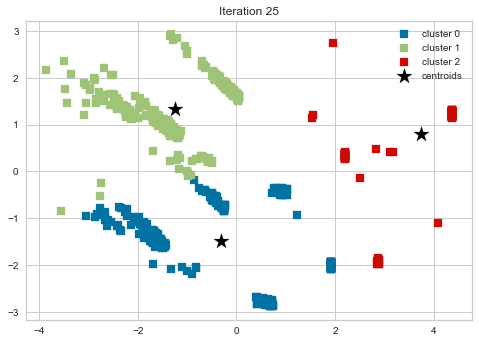

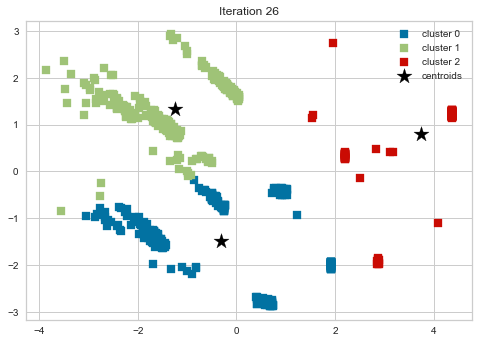

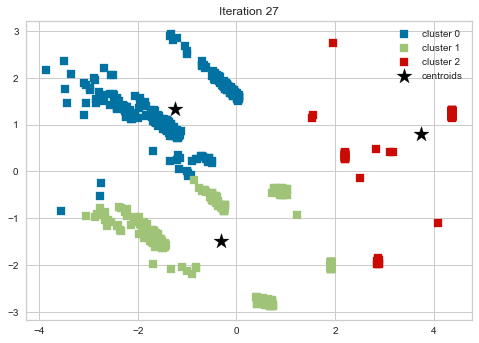

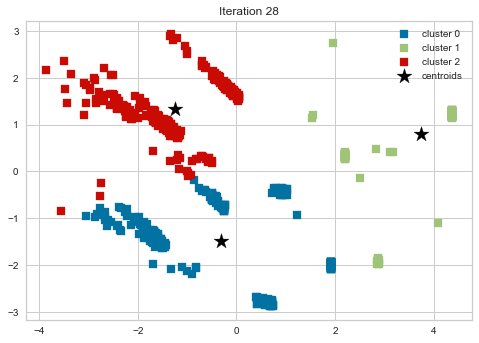

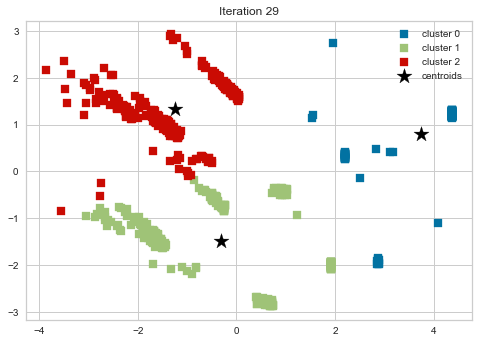

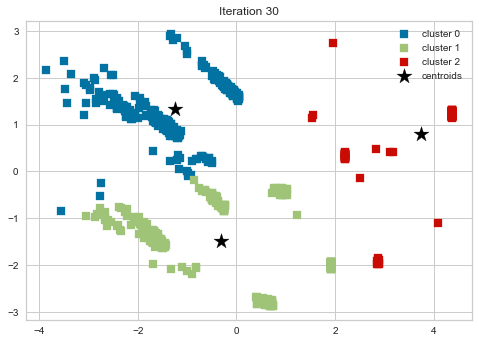

<Figure size 576x396 with 0 Axes>

In [44]:
ig,ax=plt.subplots()   
    
# assemble the iteration data
nbr_clusts = 3
for i in range(1,31):
    temp = KMeans(n_clusters=nbr_clusts, max_iter=i)
    temp.fit_transform(X_pca)
    k_labels = temp.labels_
    plt.title(f'Iteration {i}')
    X_centroids = []
    Y_centroids = []
        
    for cluster in set(k_labels):
        x = X_pca[k_labels == cluster, 0]
        y = X_pca[k_labels == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x, y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    plt.scatter(X_centroids,
                Y_centroids,
                marker='*',
                c='black',
                s=250,
                label='centroids')
    plt.legend()
          
    plt.pause(1)
    plt.savefig(f' {i}cust3.png')

<H><B>DF_SEGMENTATION_2</B></H>

In [28]:
savings_df = pd.read_csv("df_segmentation_2.csv")

In [29]:
savings_df

cust_id    saving      debt  have_saving_N  have_saving_Y  have_credit_N  \
0    1362480  0.595992 -0.665175              0              1              0   
1    1362484  1.504530 -0.305440              0              1              0   
2    1362486 -0.446297 -0.685747              0              1              1   
3    1362487 -0.546808  0.906818              0              1              0   
4    1362489 -0.195958 -0.665175              0              1              0   
..       ...       ...       ...            ...            ...            ...   
726  1362878 -0.559344 -0.685747              1              0              1   
727  1363244 -0.559344 -0.685747              1              0              1   
728  1363019 -0.559344 -0.685747              1              0              1   
729  1362876 -0.559344 -0.685747              1              0              1   
730  1363099 -0.559344 -0.685747              1              0              1   

     have_credit_Y  lots_small_N  lots_small_Y  fews_huge_N  fews_huge_Y  \
0                1             0             1            0            1   
1                1             1             0            0            1   
2                0             0             1            0            1   
3                1             1             0            0            1   
4                1             0             1            0            1   
..             ...           ...           ...          ...          ...   
726              0             1             0            1            0   
727              0             1             0            1            0   
728              0             1             0            1            0   
729              0             1             0            1            0   
730              0             1             0            1            0   

     cluster_id  
0             1  
1             2  
2             0  
3             1  
4             1  
..          ...  
726           0  
727           0  
728           0  
729           0  
730           0  

[731 rows x 12 columns]

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(savings_df)

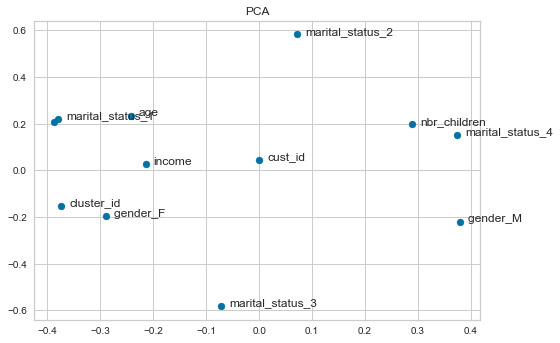

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_df)
components = pca.components_

fig, ax = plt.subplots(1,1)
ax.set_title("PCA")
ax.scatter(components[0], components[1])

for i, txt in enumerate(customer_df.columns.to_list()):
    ax.annotate(txt, (components[0][i], components[1][i]), xytext=(8,0), textcoords='offset points')
    
fig.savefig('images_customer/PCA_components22')

C:\Users\SPECIAL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


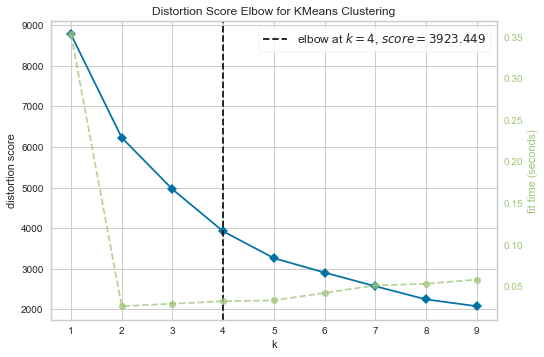

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
#Plotting Elbow Curve
from sklearn.cluster import KMeans
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_df)
visualizer.poof()

In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_df)
k_labels = kmeans.labels_

In [34]:
new_columns = kmeans.predict(scaled_df)
new_cols = pd.DataFrame(new_columns)

In [35]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

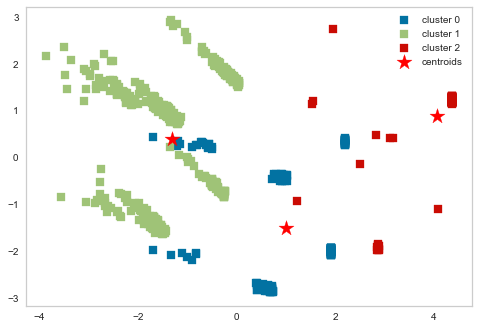

In [36]:
plot_clusters(X_pca, k_labels, plt_cluster_centers= True)

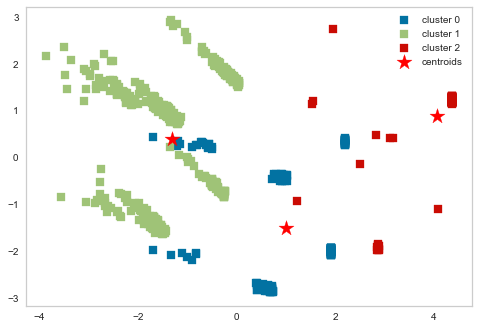

In [37]:
plot_clusters(X_pca, k_labels, plt_cluster_centers= True)

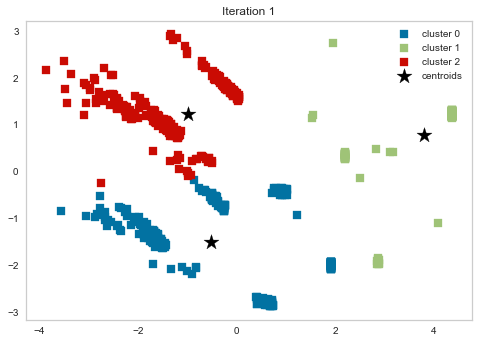

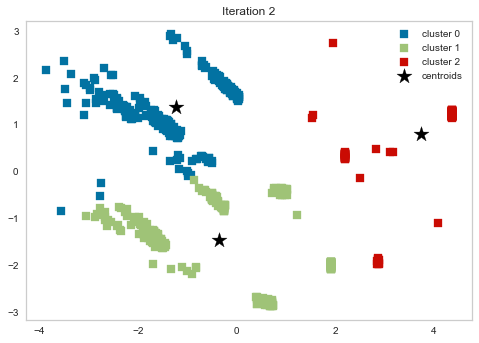

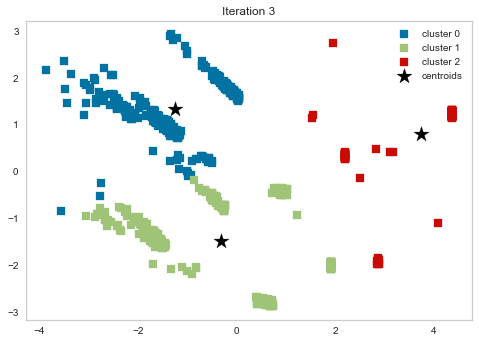

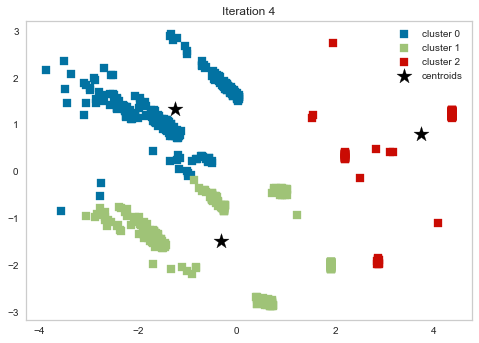

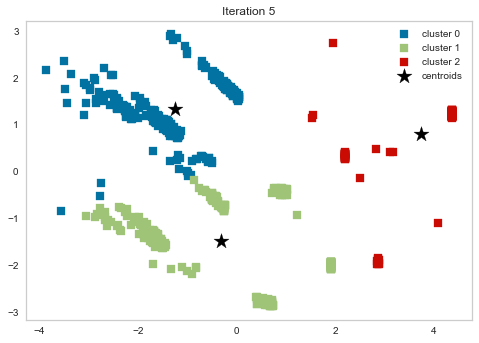

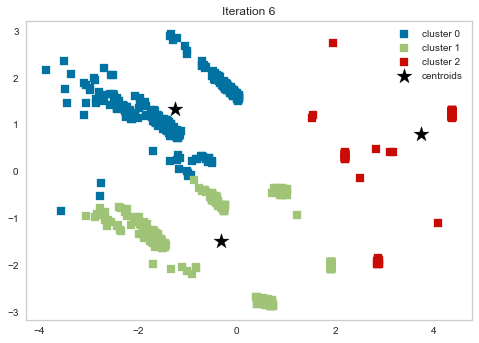

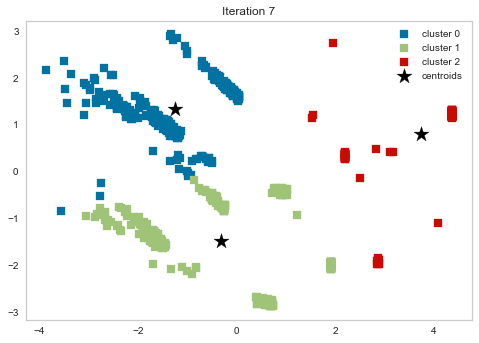

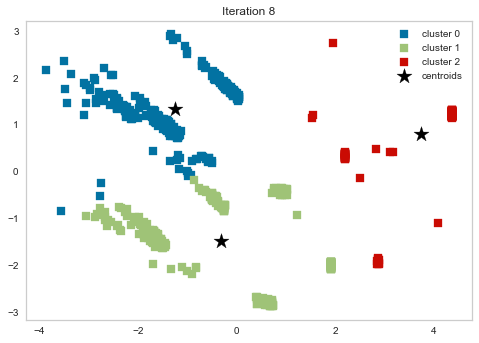

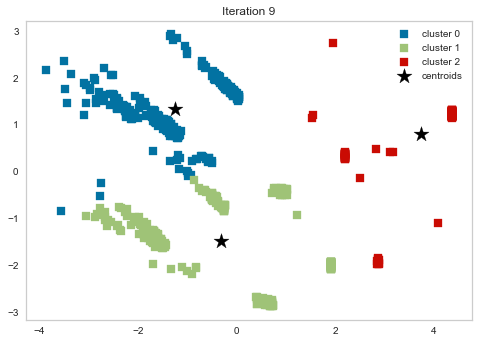

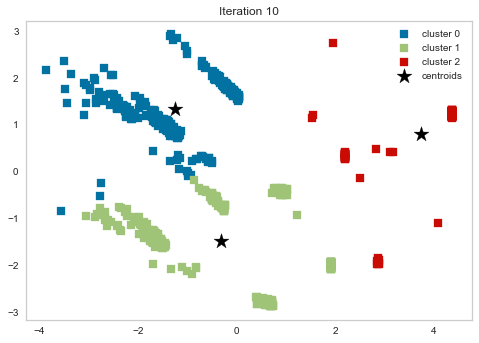

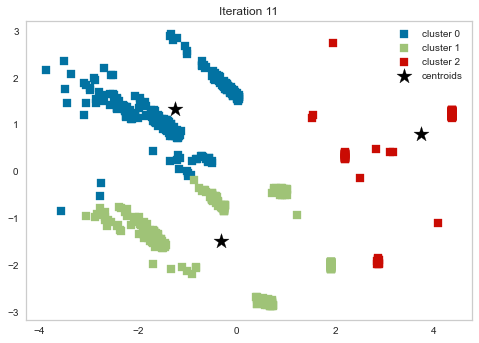

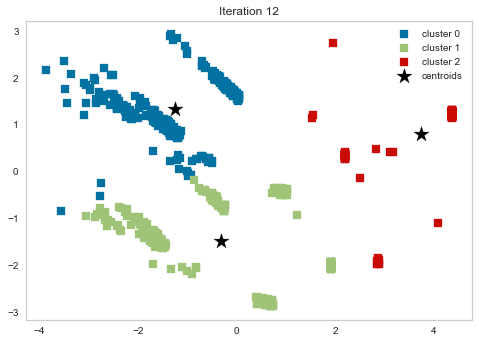

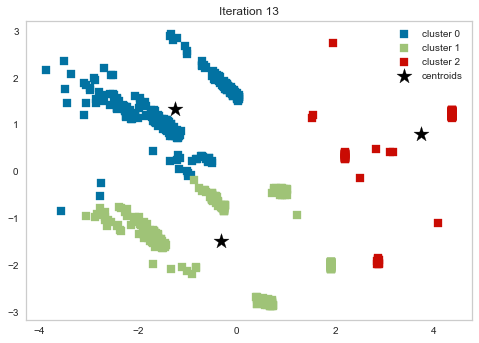

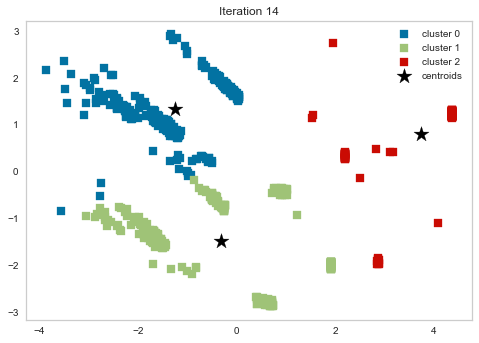

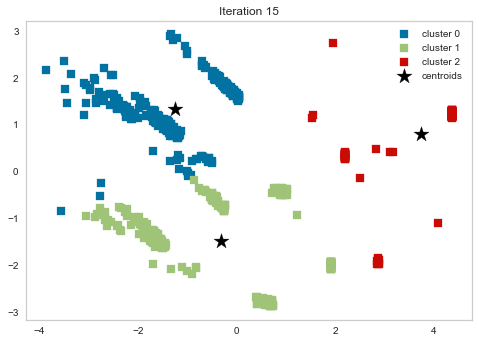

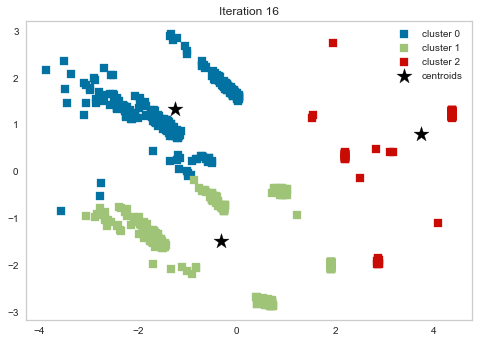

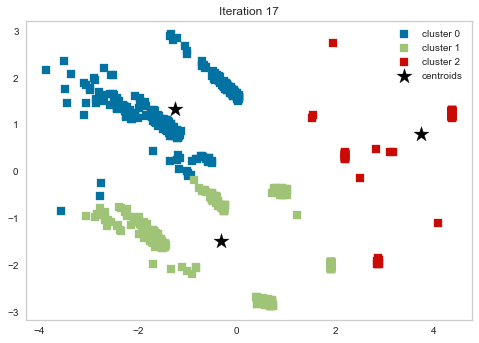

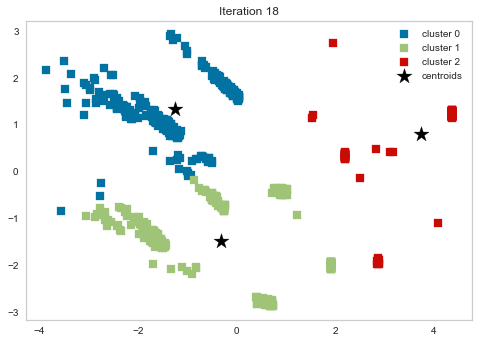

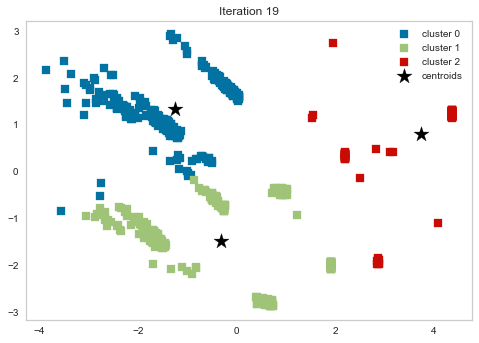

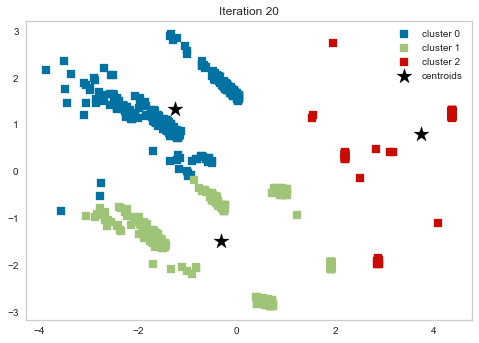

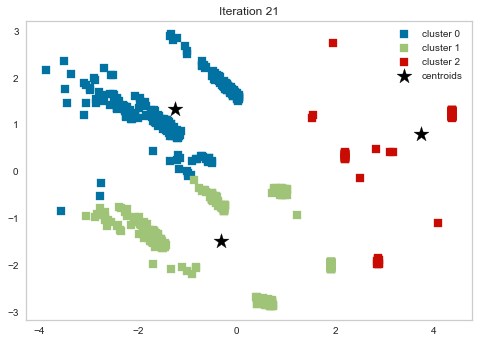

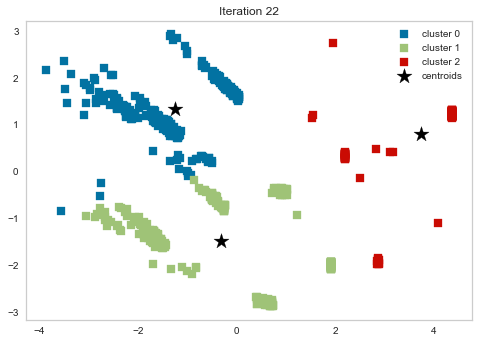

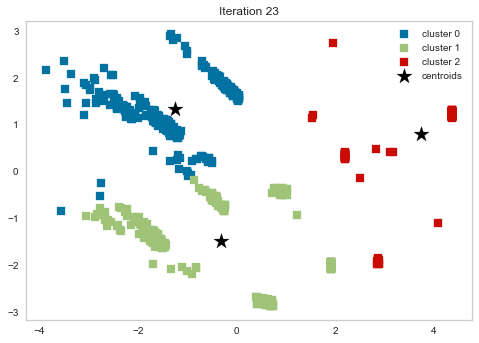

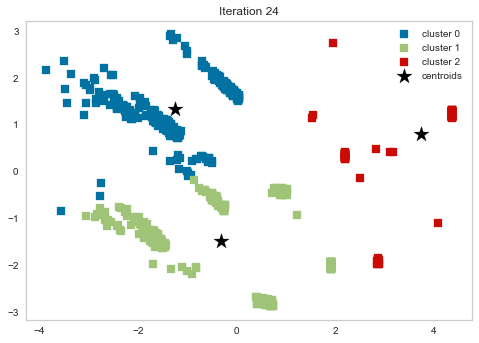

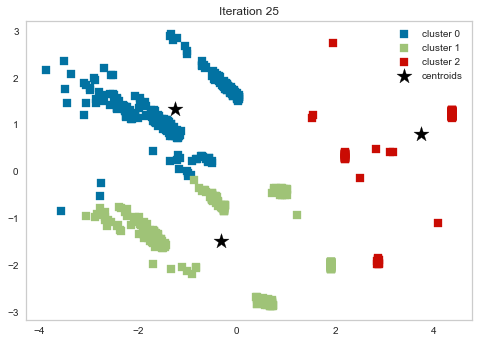

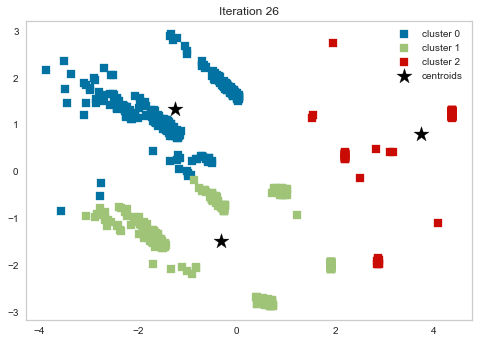

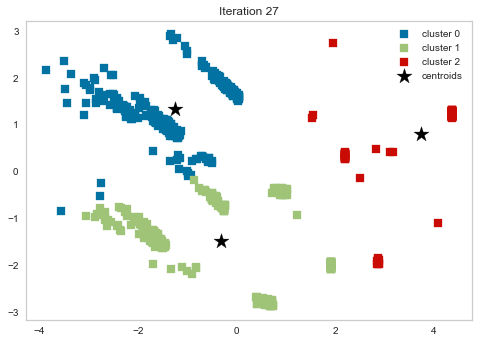

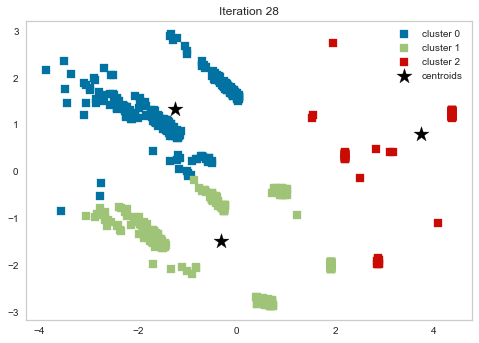

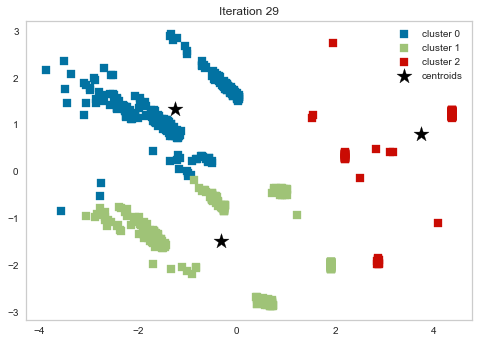

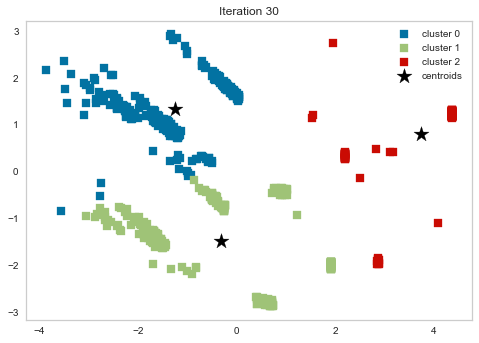

In [38]:
for i in range(1,31):
    if i == 1:
        temp = KMeans(n_clusters=3, init='random', max_iter=i, random_state=0).fit(X_pca)
    else:
        temp = KMeans(n_clusters=3, max_iter=i, random_state=42).fit(X_pca)
    clust_label = temp.labels_
    centroid = temp.cluster_centers_
    for cluster in set(clust_label):
        x = X_pca[clust_label == cluster, 0]
        y = X_pca[clust_label == cluster, 1]
        plt.scatter(x, y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    plt.scatter(centroid[:, 0], centroid[:, 1],
                marker='*',
                c='black',
                s=250,
                label='centroids')
    plt.legend()
    plt.grid()
    plt.title(f'Iteration {i}')
    plt.savefig(f'{i} bb1.png')
    plt.show()

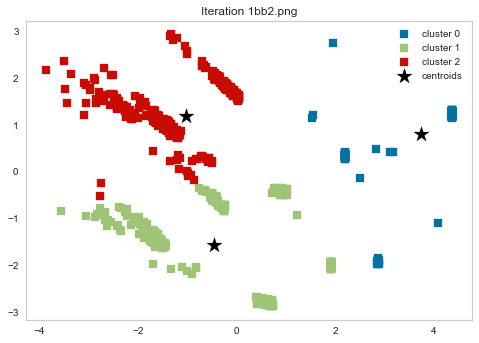

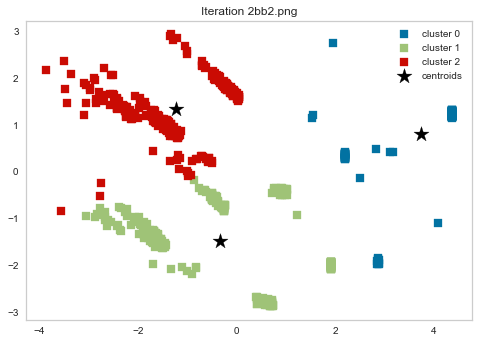

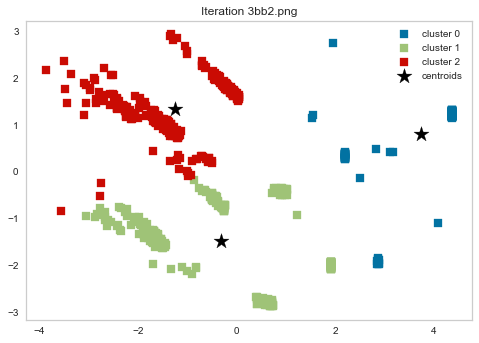

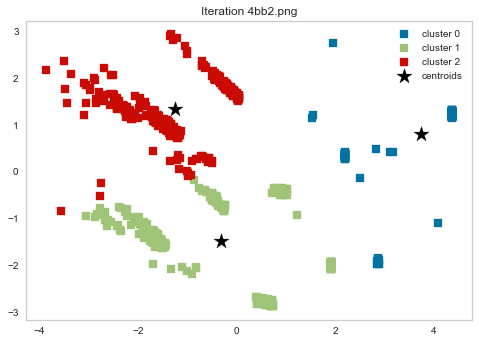

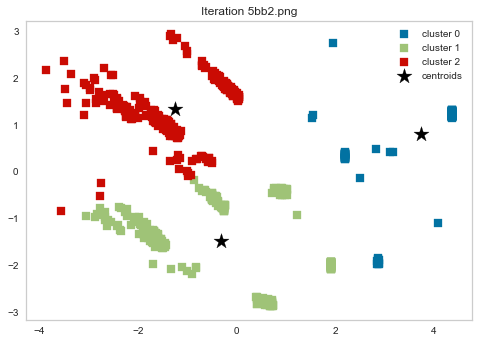

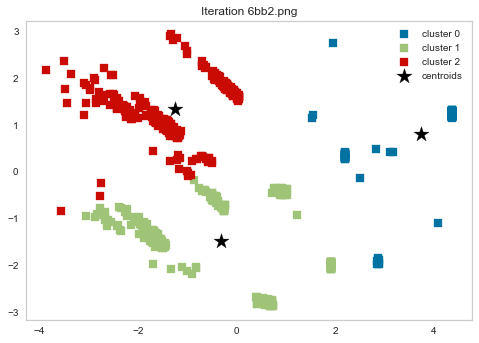

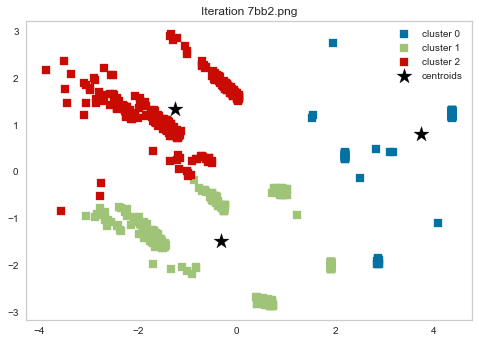

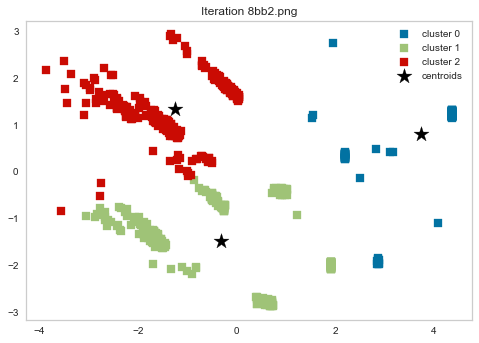

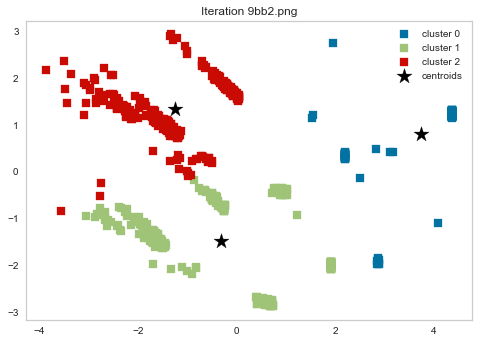

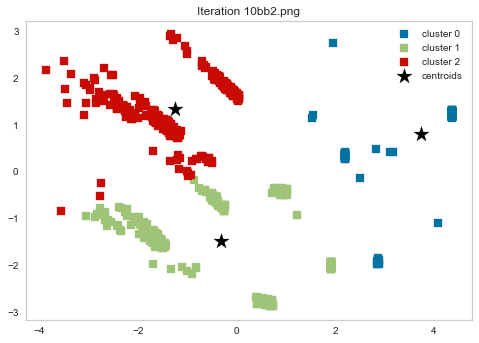

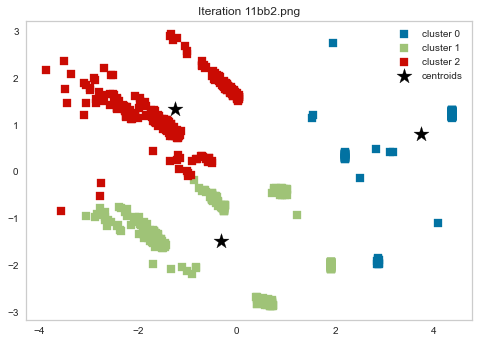

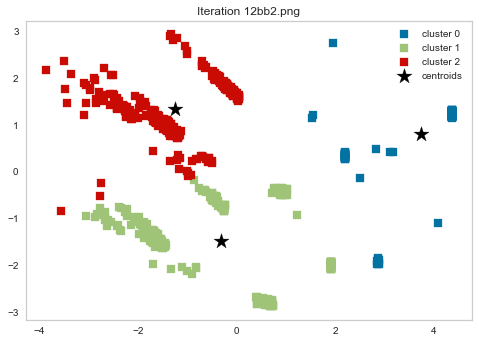

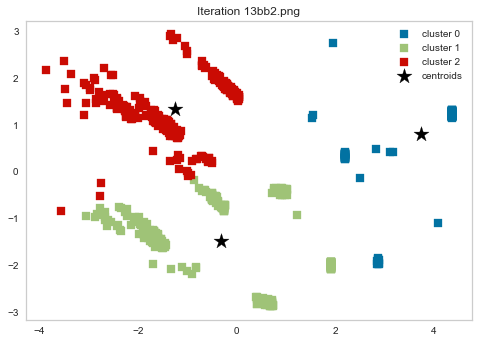

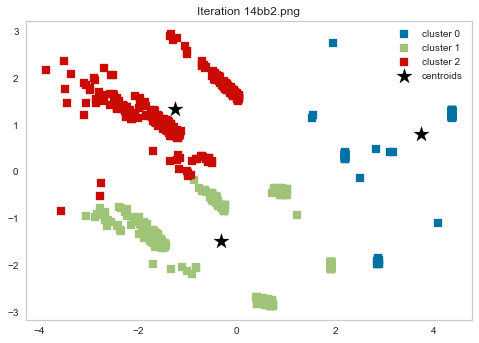

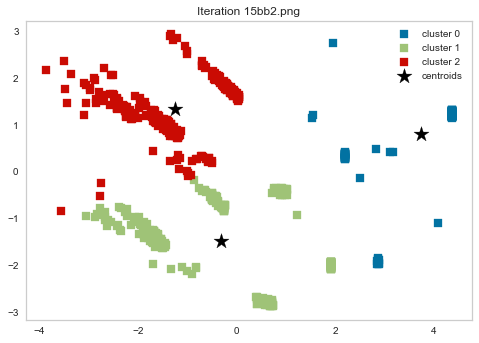

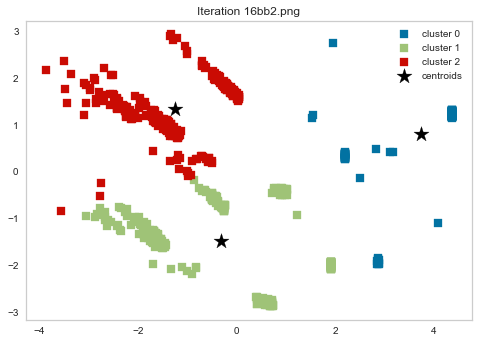

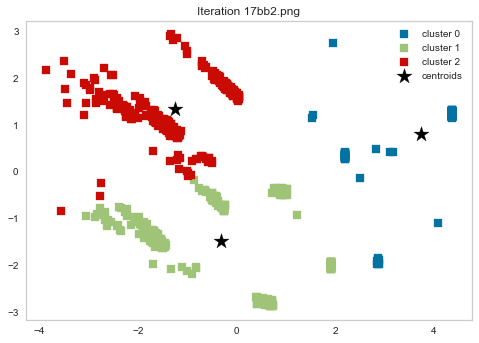

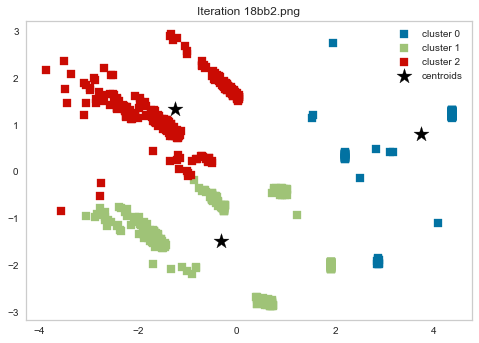

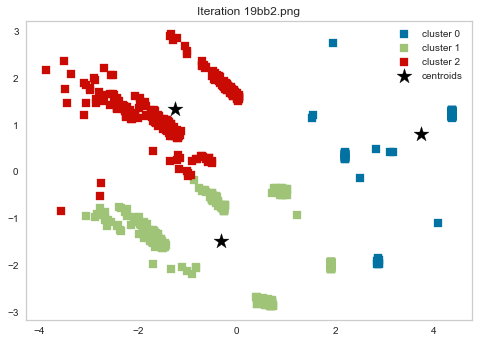

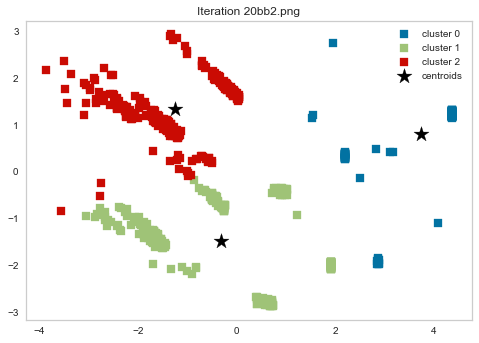

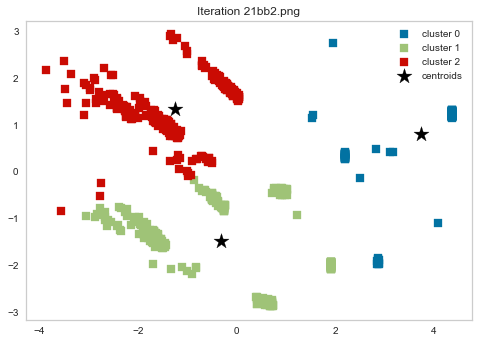

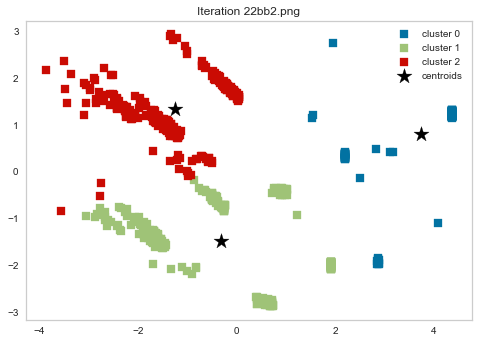

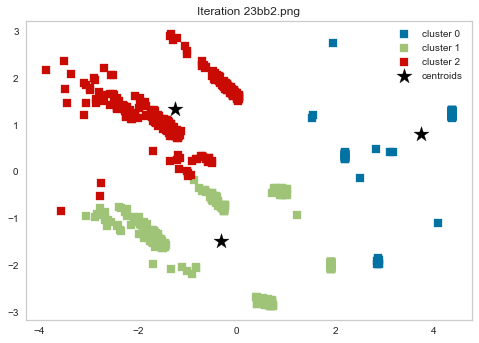

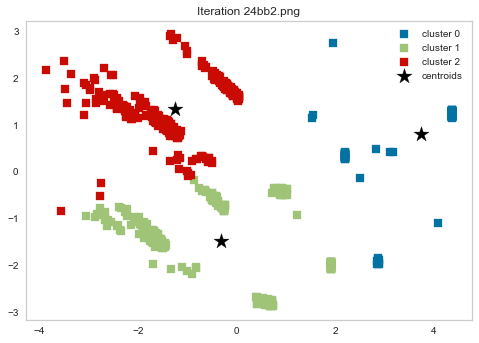

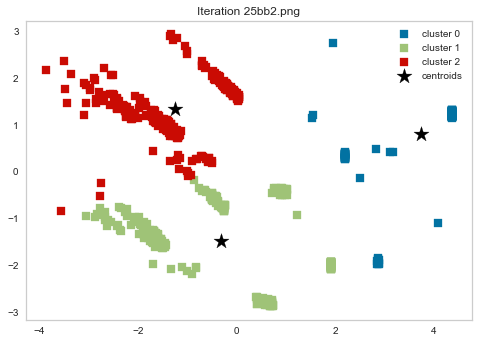

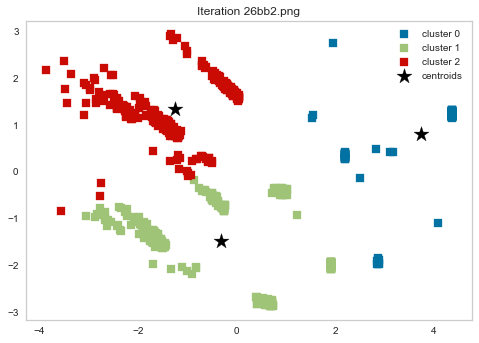

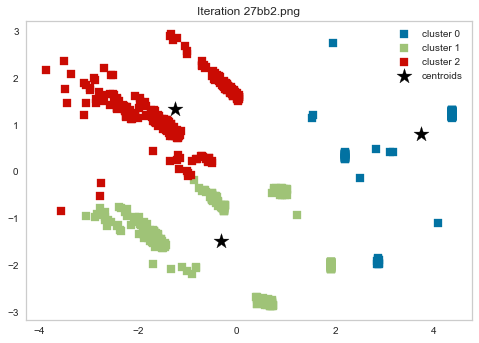

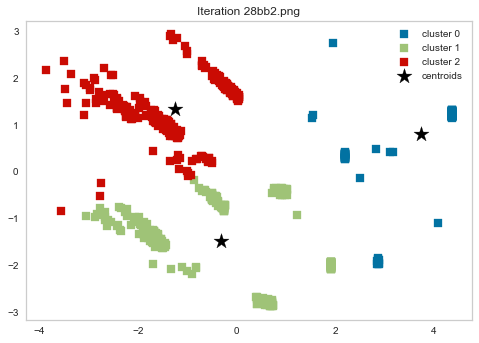

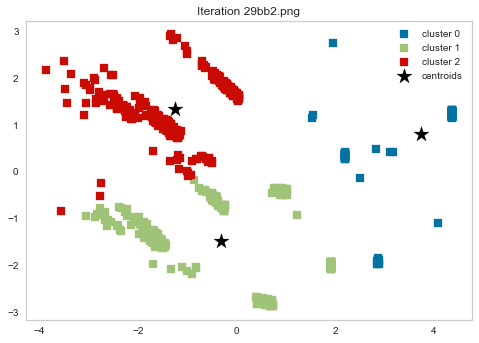

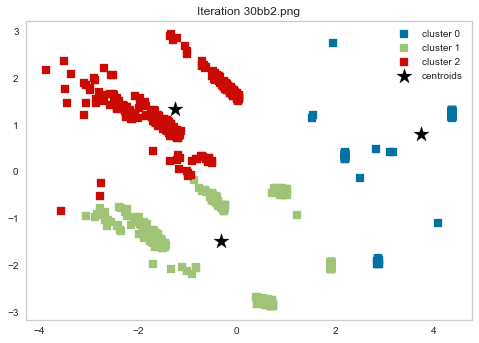

In [45]:
for i in range(1,31):
    temp = KMeans(n_clusters=3, max_iter=i, random_state=0).fit(X_pca)
    clust_label = temp.labels_
    centroid = temp.cluster_centers_
    for cluster in set(clust_label):
        x = X_pca[clust_label == cluster, 0]
        y = X_pca[clust_label == cluster, 1]
        plt.scatter(x, y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
    plt.scatter(centroid[:, 0], centroid[:, 1],
                marker='*',
                c='black',
                s=250,
                label='centroids')
    plt.title(f'Iteration {i}bb2.png')
    plt.legend()
    plt.grid()
    plt.show()

In [40]:
def plot_clusters_title(X,y_res, title):
    
    for cluster in set(y_res):
        X_centroids = []
        Y_centroids = []
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        plt.title(f'Iteration {title}')
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='black',
                    s=250,
                    label='centroids')
    #plt.legend()
    plt.grid()
    plt.savefig(f'cust_demo_kmean_iter/Iteration {title}')
    plt.show()

In [41]:
k_labels_list = []
for i in range(1,31):
    temp = KMeans(n_clusters=3, max_iter=i)
    temp.fit_transform(scaled_df)
    k_labels_list.append(temp.labels_)

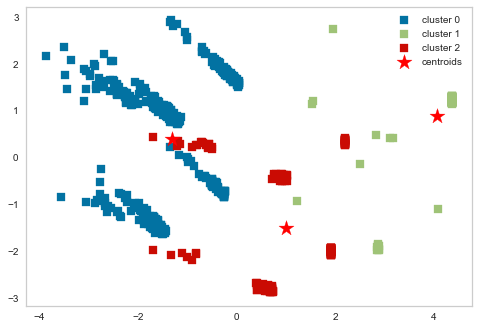

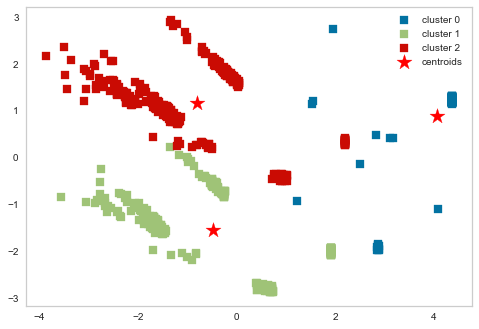

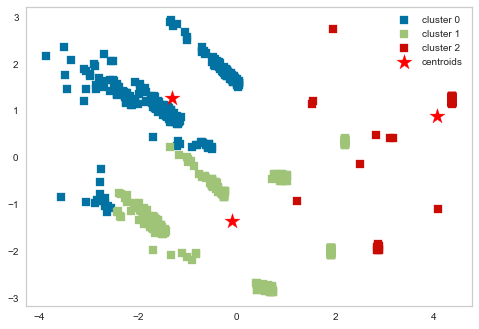

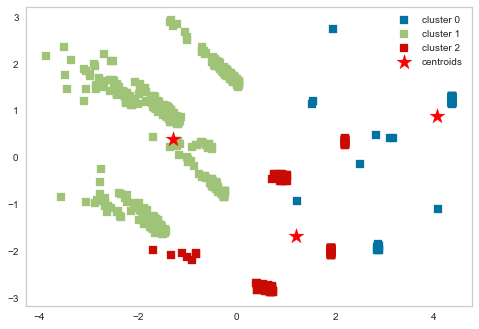

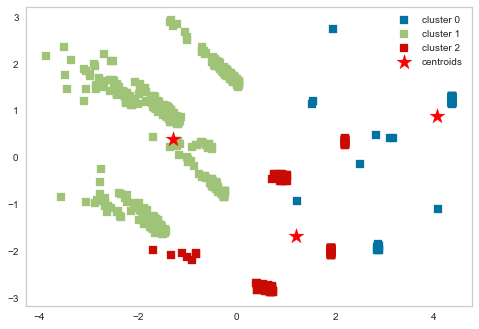

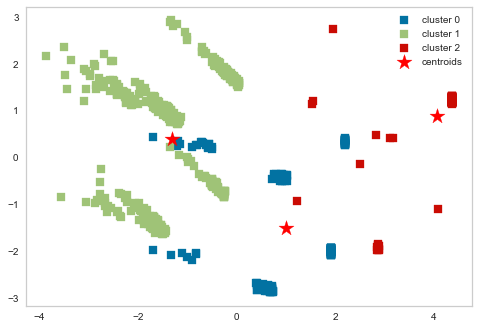

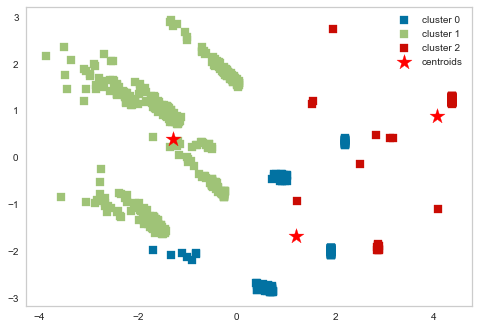

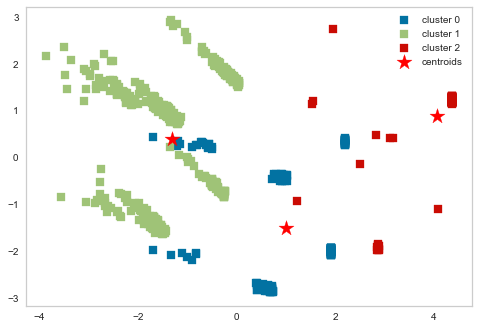

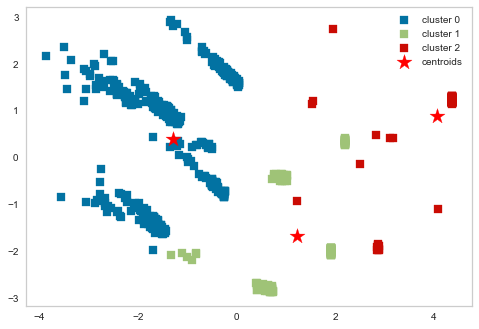

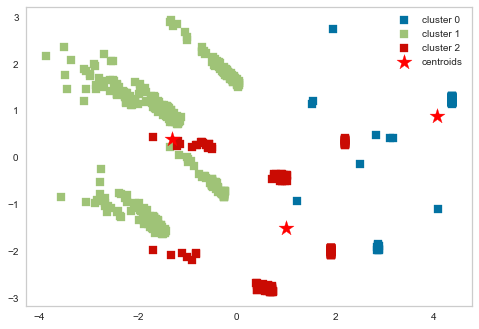

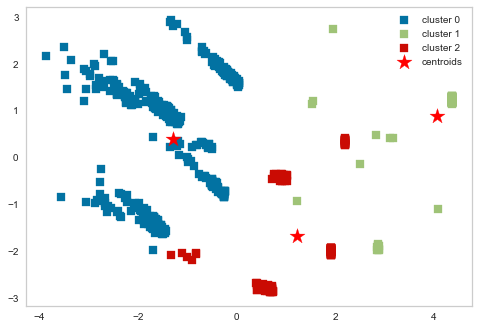

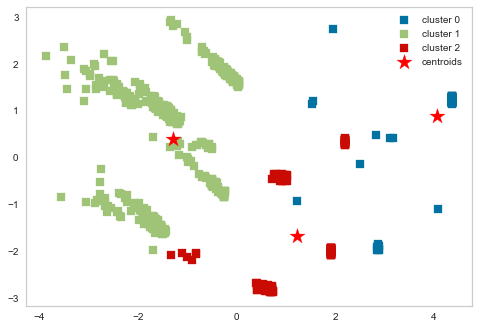

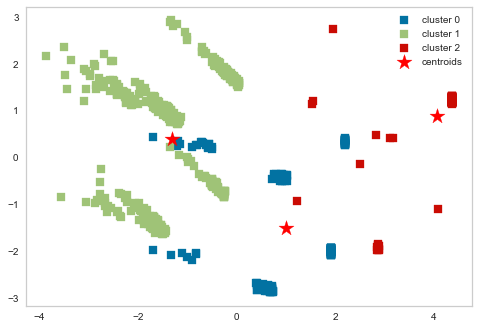

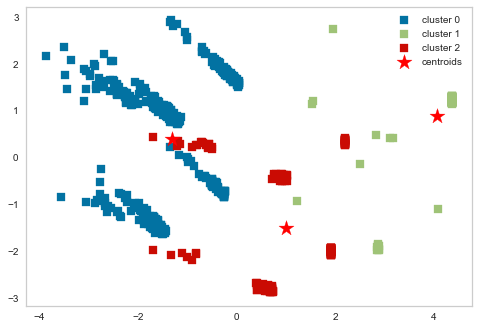

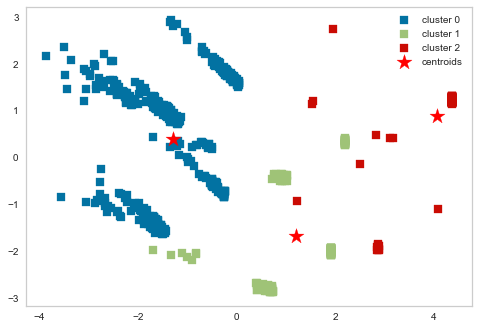

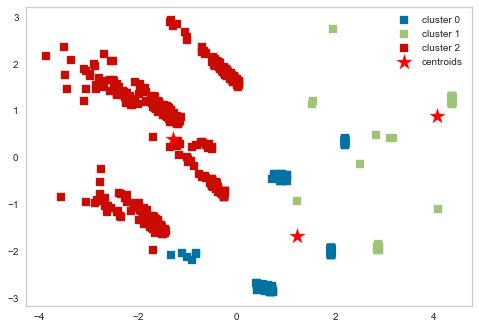

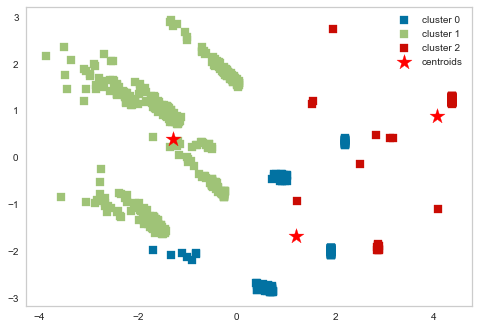

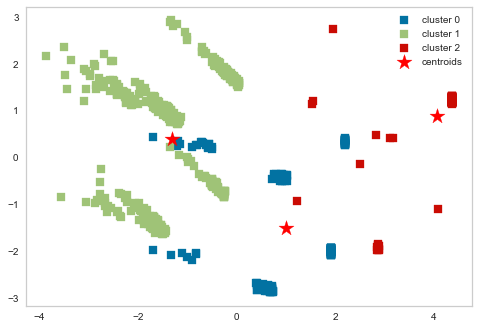

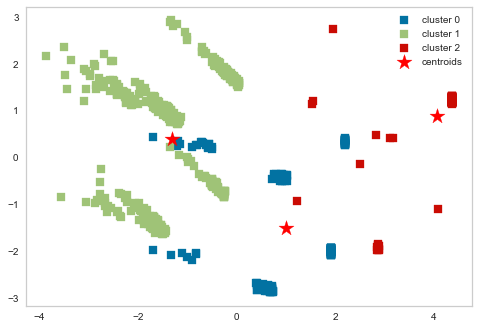

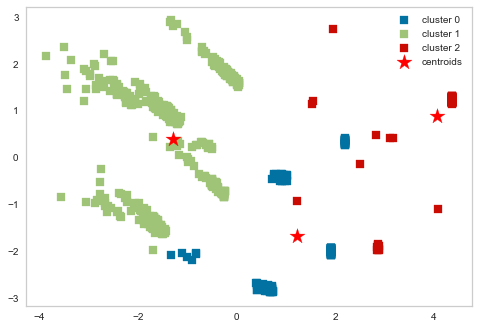

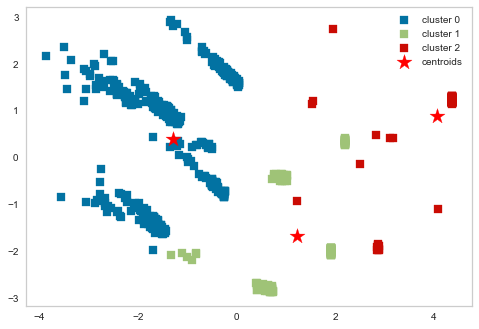

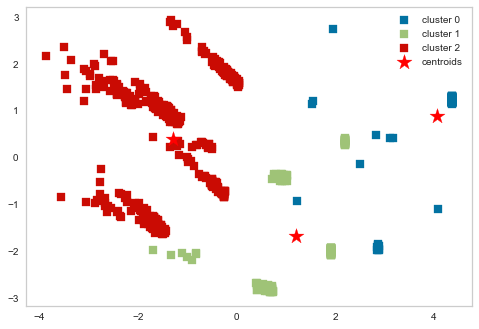

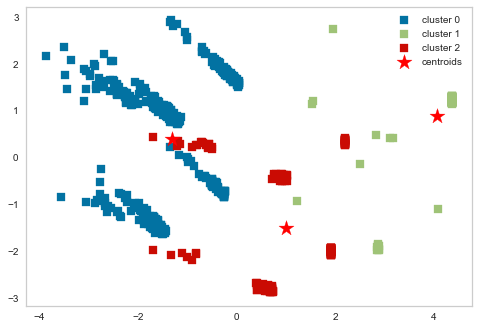

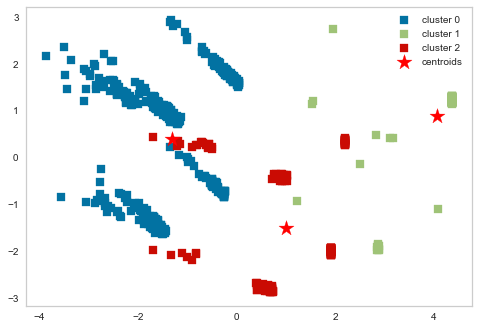

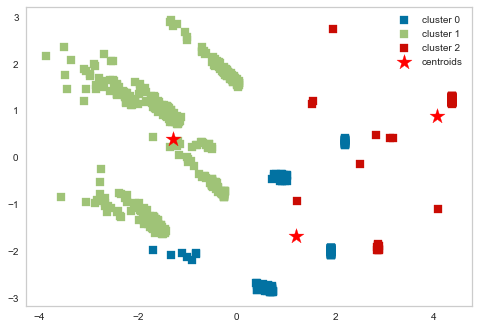

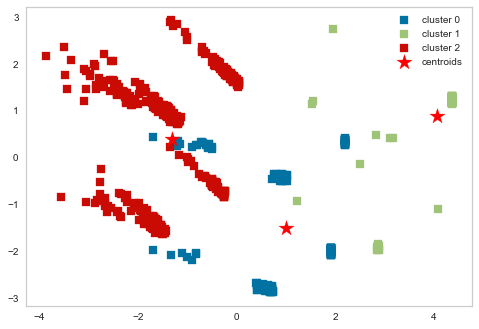

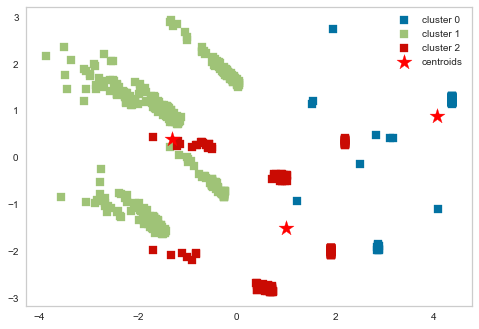

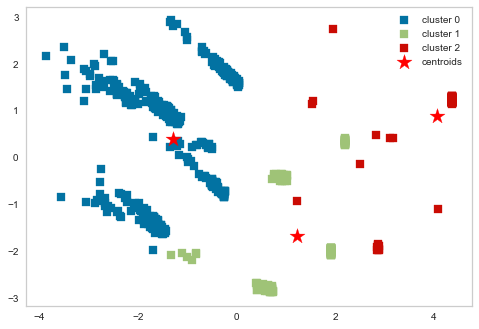

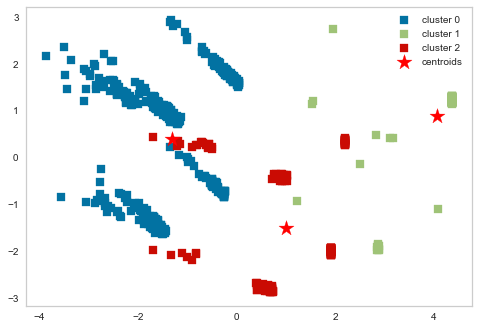

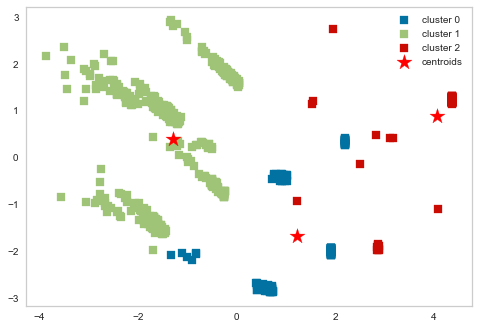

In [42]:
ctr = 1
for i in k_labels_list:
    plot_clusters(X_pca, i, ctr)
    ctr += 1

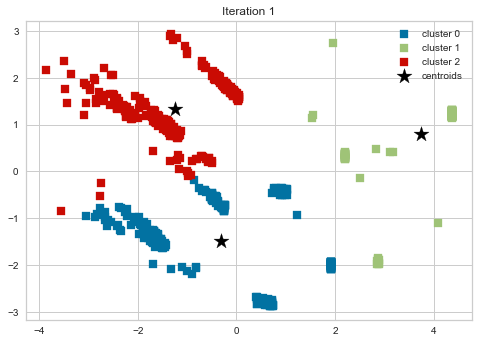

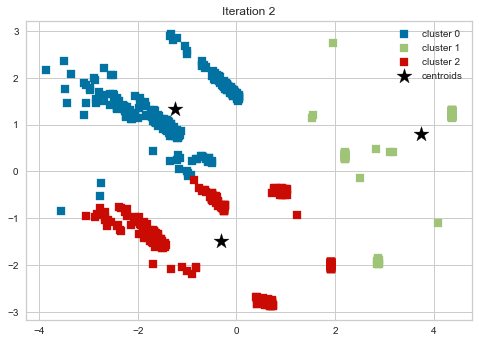

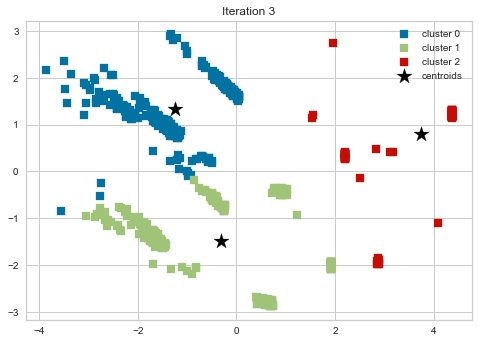

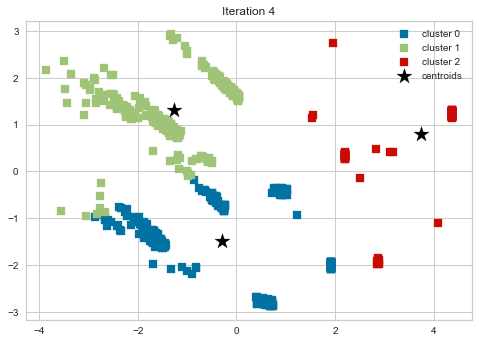

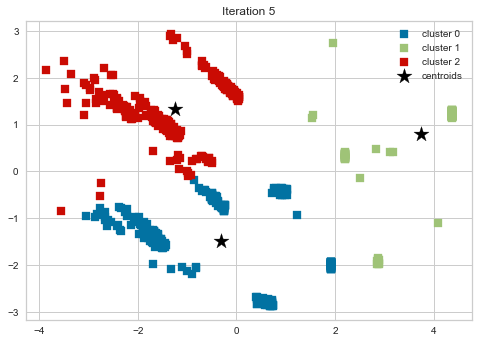

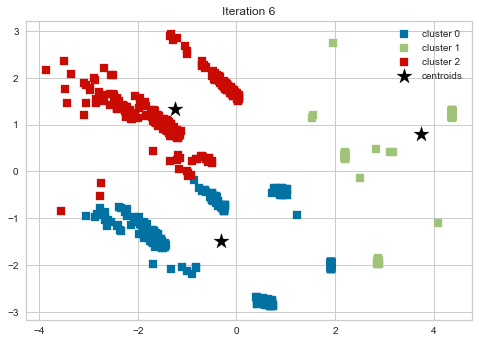

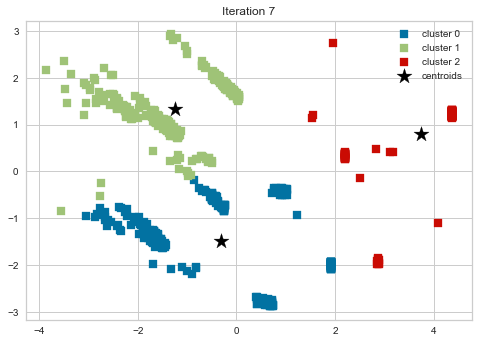

In [ ]:
ig,ax=plt.subplots()   
    
# assemble the iteration data
nbr_clusts = 3
for i in range(1,31):
    temp = KMeans(n_clusters=nbr_clusts, max_iter=i)
    temp.fit_transform(X_pca)
    k_labels = temp.labels_
    plt.title(f'Iteration {i}')
    X_centroids = []
    Y_centroids = []
        
    for cluster in set(k_labels):
        x = X_pca[k_labels == cluster, 0]
        y = X_pca[k_labels == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x, y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    plt.scatter(X_centroids,
                Y_centroids,
                marker='*',
                c='black',
                s=250,
                label='centroids')
    plt.legend()
          
    plt.pause(1)
    plt.savefig(f' {i}bb3.png')